# **💼 Attrition in an Organization || Why Workers Quit?**

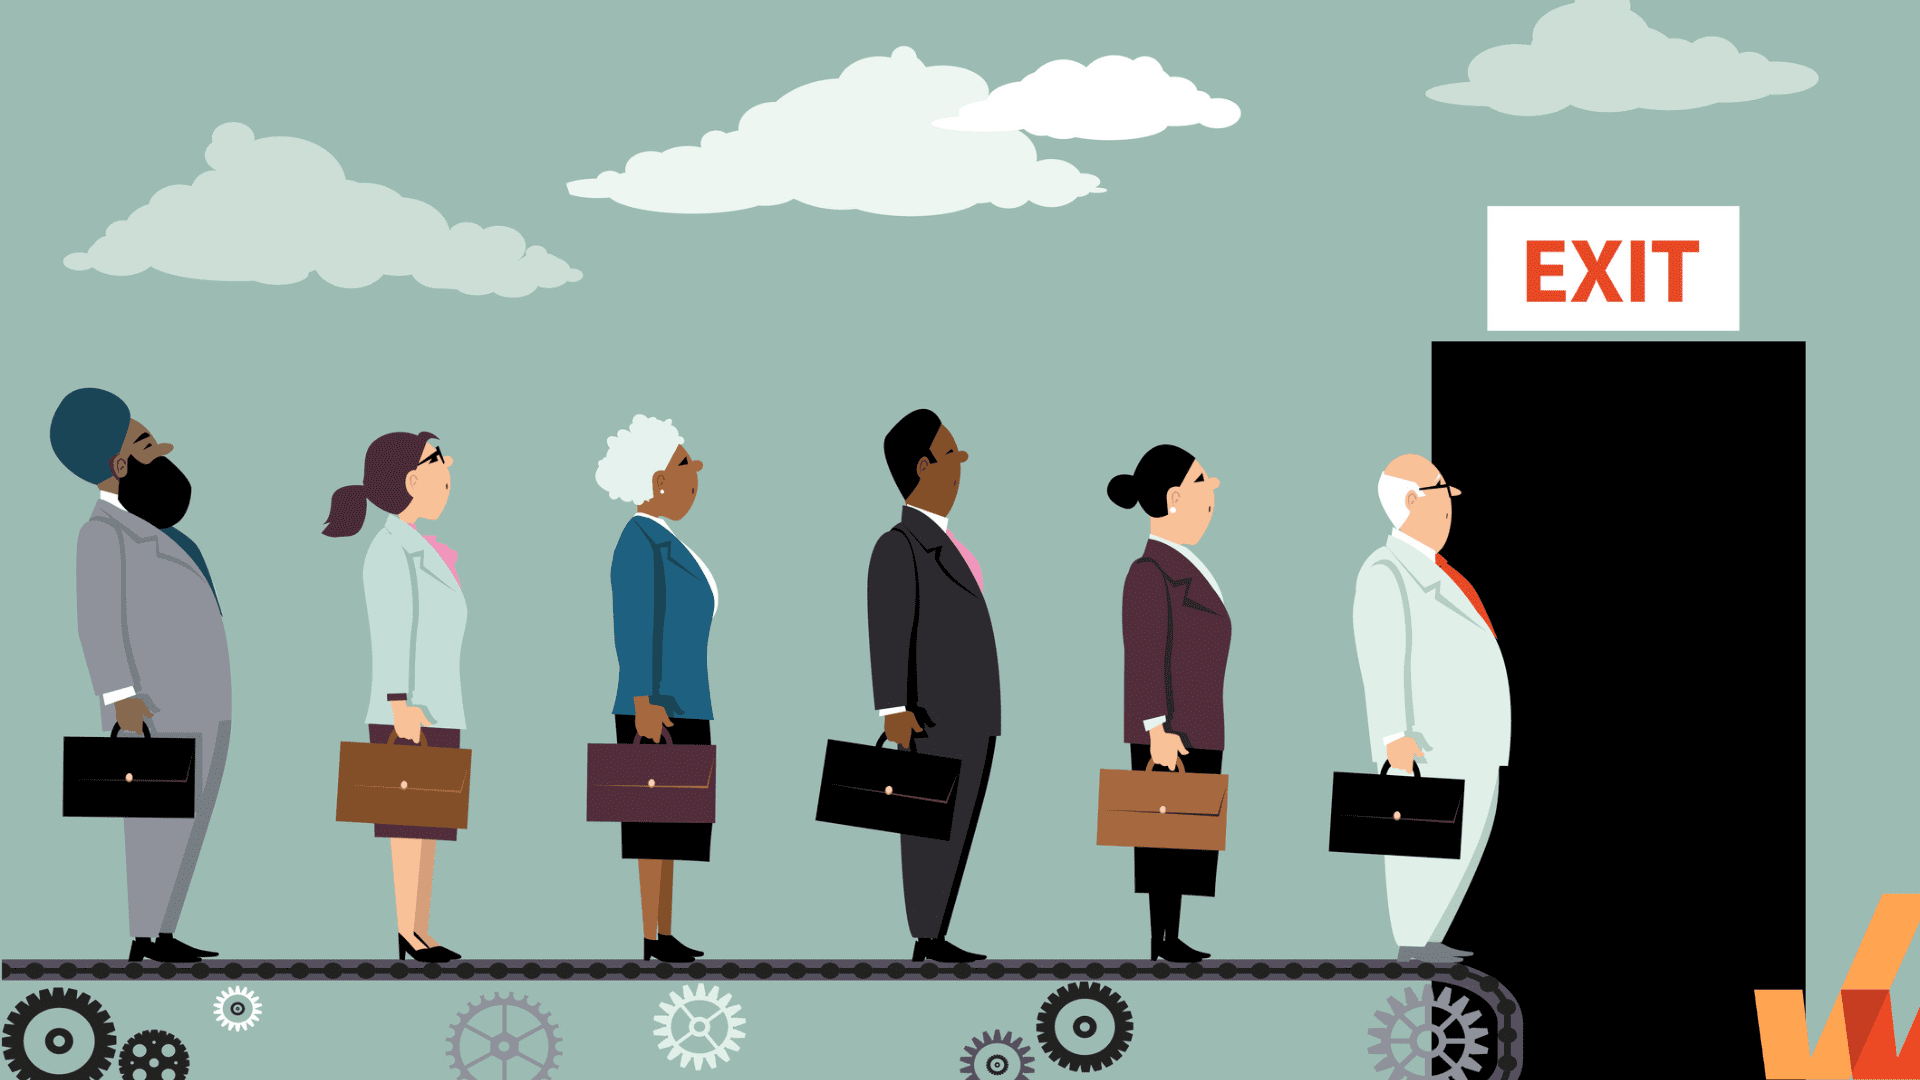

Employees are the backbone of the organization. Organization's performance is heavily based on the quality of the employees. Challenges that an organization has to face due employee attrition are:



*   Expensive in terms of both money and time to train new employees.

*   Loss of experienced employees

*   Impact in productivity



*   Impact profit




TARGET VARIABLE: ATTRITION

Dataset used : https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset



*   Education [1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor']



*   EnvironmentSatisfaction [1 'Low' 2 'Medium' 3 'High' 4 'Very High']


*  JobInvolvement [1 'Low' 2 'Medium' 3 'High' 4 'Very High']


*   JobSatisfaction [1 'Low' 2 'Medium' 3 'High' 4 'Very High']


*   joblevel [1 'low' 2-5 'increasing the level]






*   PerformanceRating [1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding']




*  RelationshipSatisfaction [1 'Low' 2 'Medium' 3 'High' 4 'Very High']

  

*  WorkLifeBalance [1 'Bad' 2 'Good' 3 'Better' 4 'Best']


*  StockOptionLevel [0 'no stock option' 1,2,3 'increasing level of stock option]









# **Importing File**

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr

In [3]:
data=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1460 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1465 non-null   object 
 5   DistanceFromHome          1466 non-null   float64
 6   Education                 1470 non-null   int64  
 7   EducationField            1467 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [ ]:
data.shape

(1470, 35)

In [ ]:
data.size

51450

In [ ]:
data.ndim

2

# **Univariate analysis**

# **Describe**

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1466.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.200546,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.110796,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
col=['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

# **VALUE COUNTS IN EACH COL**

In [ ]:
for column in col:
    print(f"Value counts for {column}:")
    print(data[column].value_counts())
    print("\n")


Value counts for Age:
Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64


Value counts for Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64


Value counts for BusinessTravel:
BusinessTravel
Travel_Rarely        1033
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


Value counts for DailyRate:
DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64


Value counts for Department:
Department
Research & Development    956
Sales                     446
Human Resources           

# **EDA(Exploratory Data Analysis)**

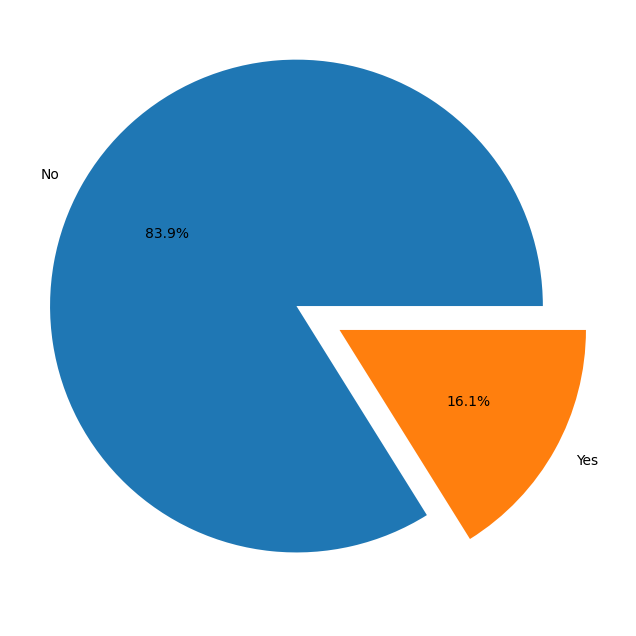

In [ ]:
plt.figure(figsize=(8,8))
pie = data.groupby('Attrition')['Attrition'].count()
plt.pie(pie, explode=[0.1, 0.1], labels=['No', 'Yes'], autopct='%1.1f%%');



*   Majority of employees didn't leave the organization.



# **(1)DISTRIBUTION OF AGE IN ATTRITION**

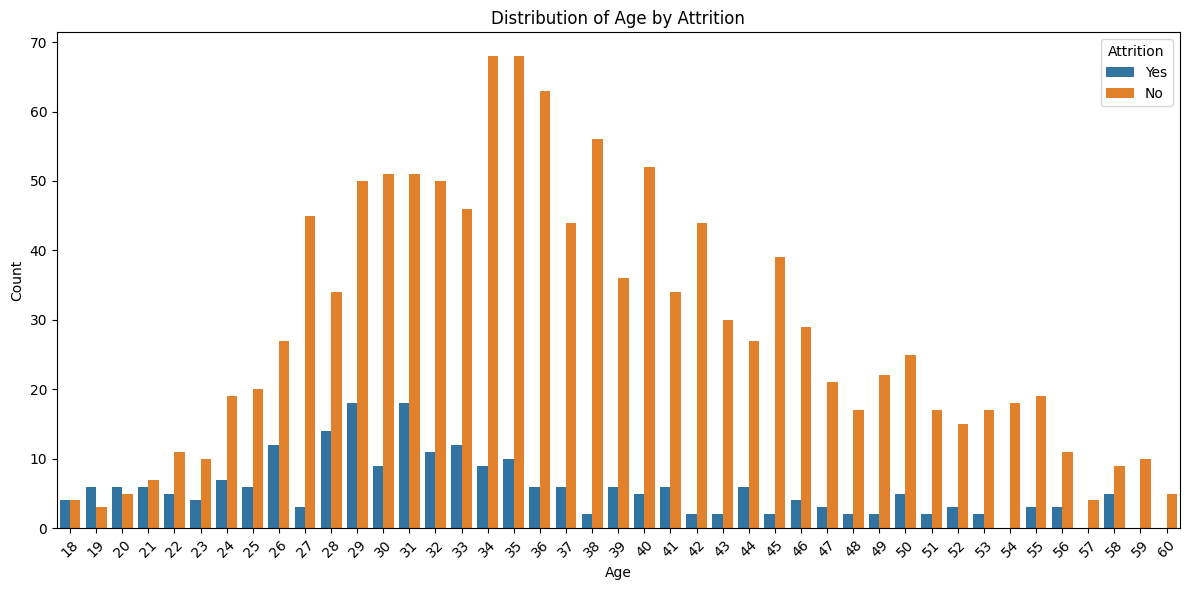

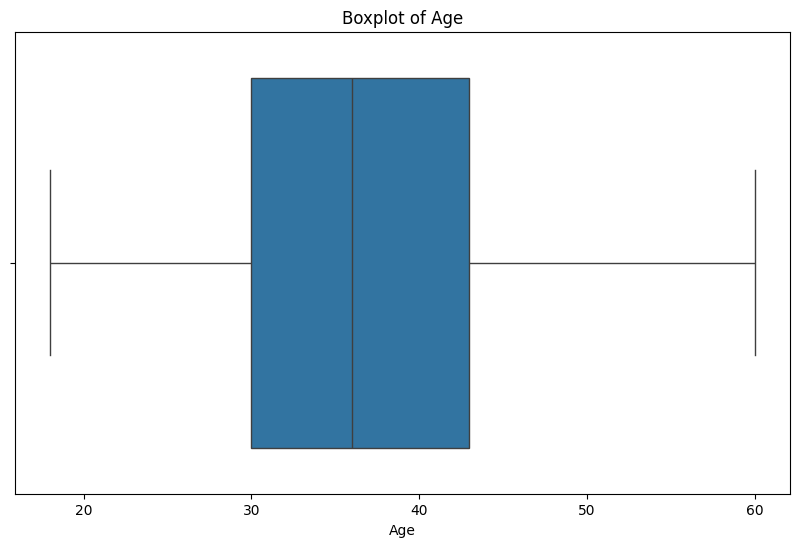

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', hue='Attrition', data=data)
plt.title('Distribution of Age by Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')
plt.tight_layout()
plt.show()

# Boxplot for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Age'])
plt.title('Boxplot of Age')
plt.show()



*  Most of the emloyees are between age 30 to 40. Age increases attrition gradually decreases. Employees with young age leaves the company more compared to elder employees.



# **(2)DISTRIBUTION OF BUSINESS TRAVEL IN ATTRITION**

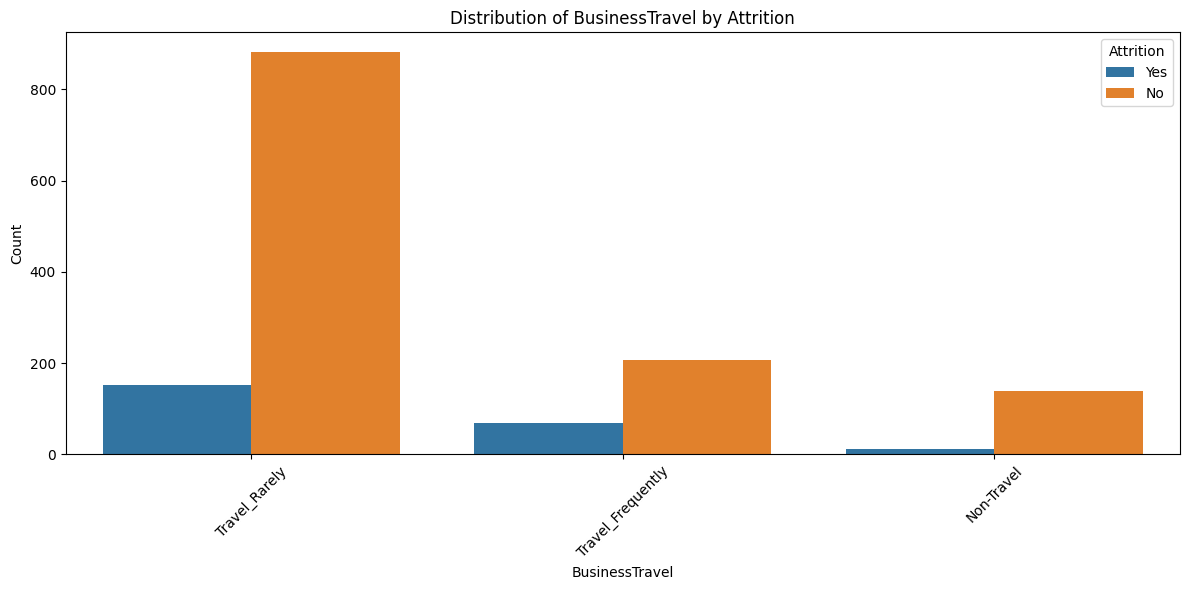

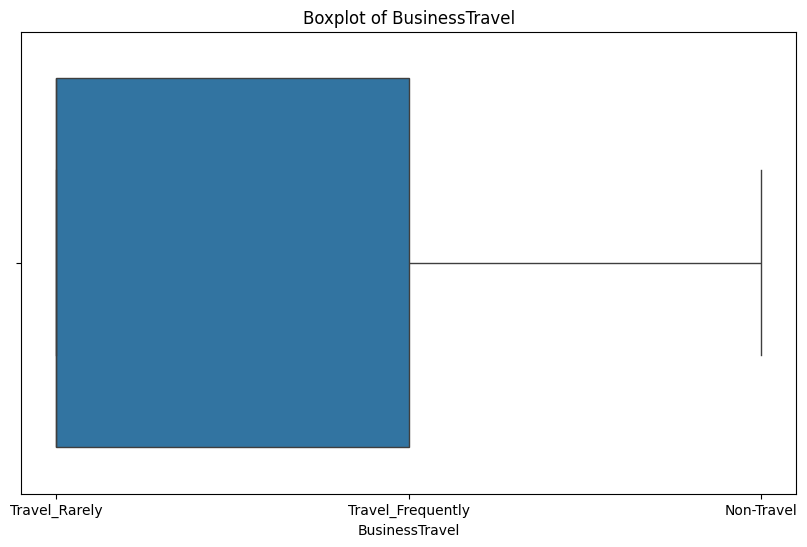

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='BusinessTravel', hue='Attrition', data=data)
plt.title('Distribution of BusinessTravel by Attrition')
plt.xlabel('BusinessTravel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')
plt.tight_layout()
plt.show()

# Boxplot for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['BusinessTravel'])
plt.title('Boxplot of BusinessTravel')
plt.show()



*   Most of the employees in the organization Travel Rarely.



*   Highest employee attrition can be observed by those employees who Travels Frequently


*  Lowest employee attrition can be observed by those employees who are Non-Travel.





# **(3)DISTRIBUTION OF DAILYRATE IN ATTRITION**

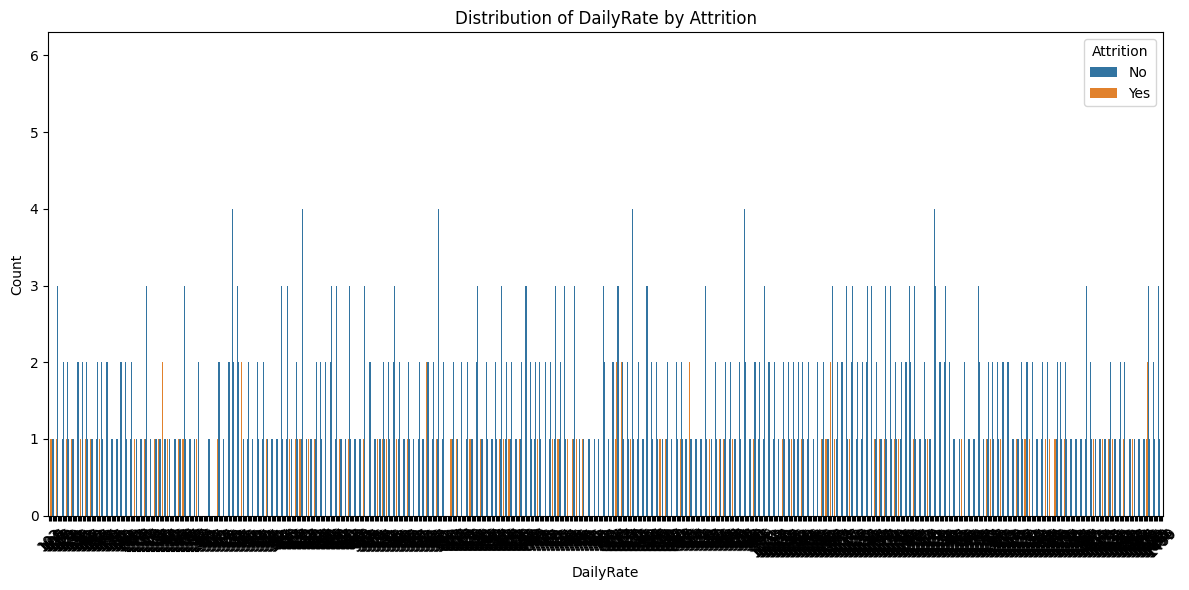

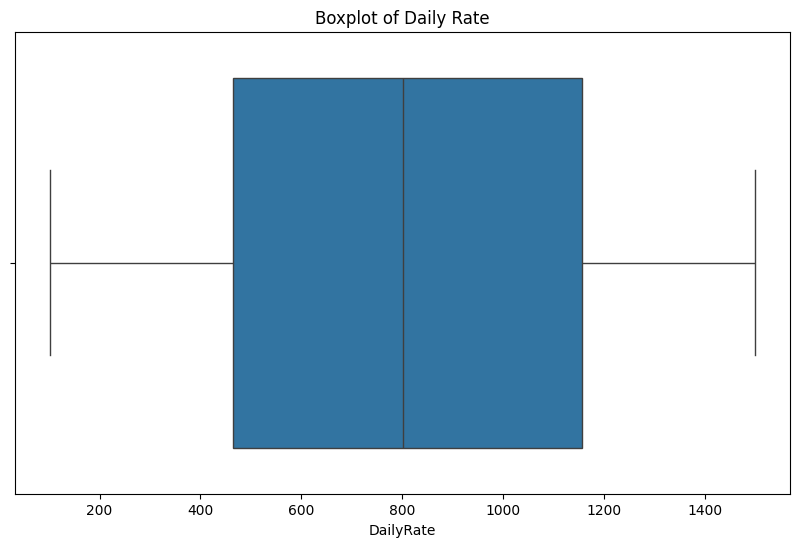

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='DailyRate', hue='Attrition', data=data)
plt.title('Distribution of DailyRate by Attrition')
plt.xlabel('DailyRate')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')
plt.tight_layout()
plt.show()

# Boxplot for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['DailyRate'])
plt.title('Boxplot of Daily Rate')
plt.show()



*   DailyRate shows a wide range of values with no clear pattern related to attrition.
*  here is no strong correlation between DailyRate and attrition, suggesting that daily pay rates alone are not a significant factor in employee turnover.



# **(4)DISTRIBUTION OF DEPARTMENT IN ATTRITION**

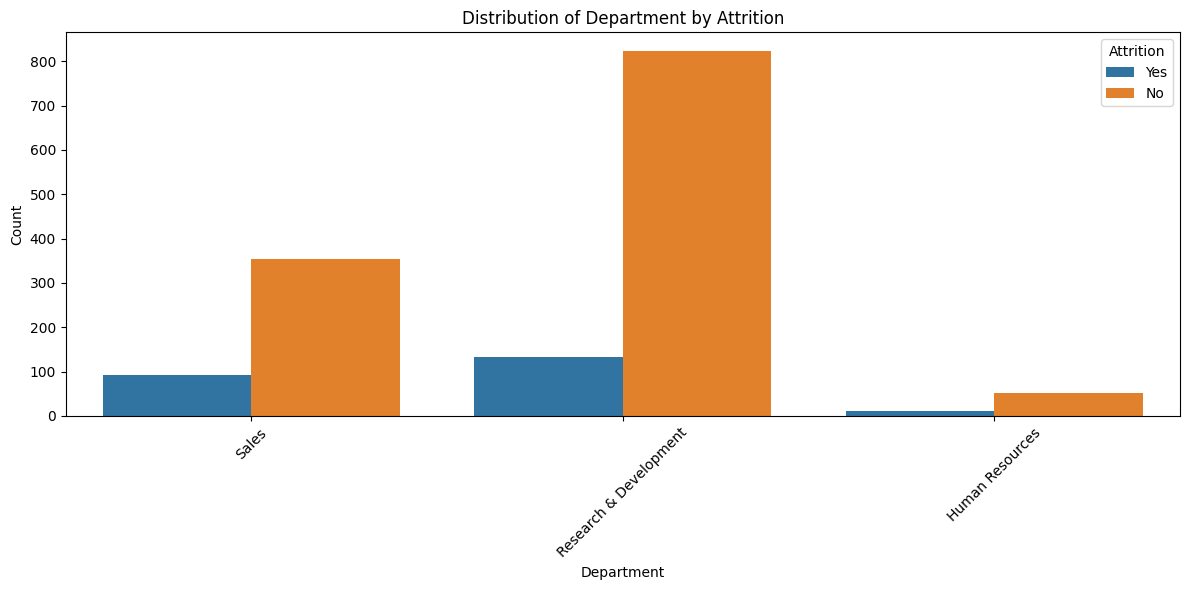

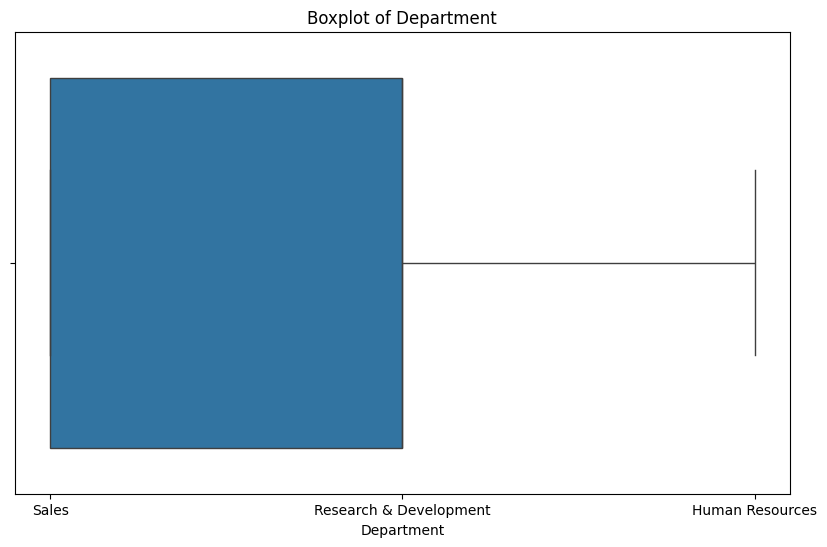

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue='Attrition', data=data)
plt.title('Distribution of Department by Attrition')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')
plt.tight_layout()
plt.show()

# Boxplot for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Department'])
plt.title('Boxplot of Department')
plt.show()



*   Most of the employees are from Research & Development Department

*   Highest Attrition is in the Sales Department.


*   Human Resources Department Attrition rate is also very high.



*   Attrition in Research & Development Department is least compared to other departments.







## **(5)DISTRIBUTION OF DISTANCE FROM HOME IN ATTRITION**

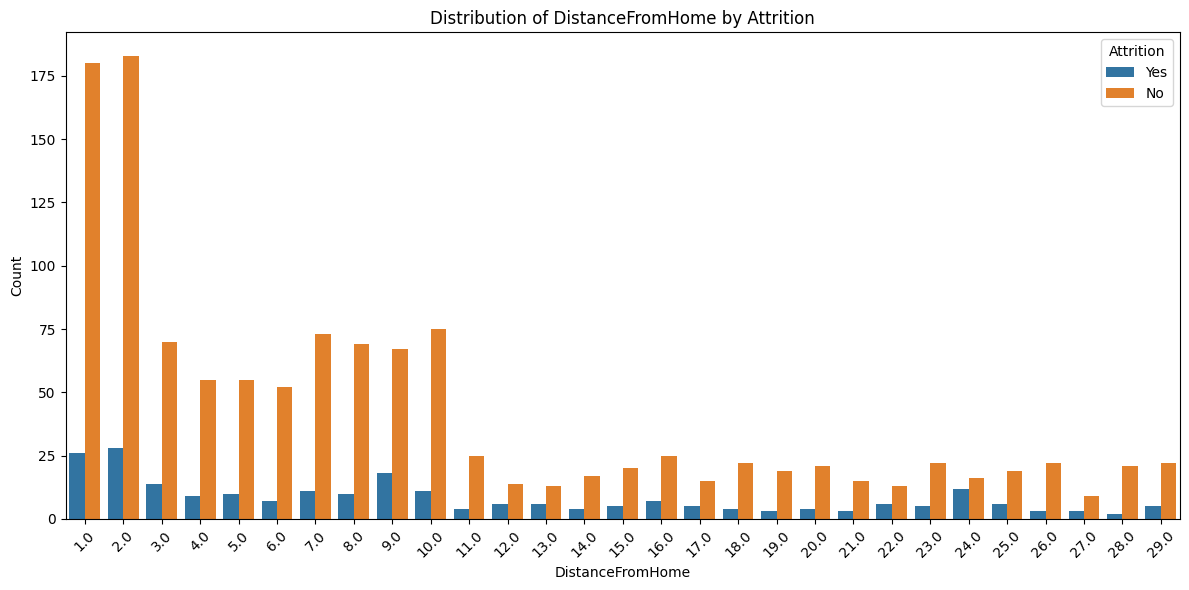

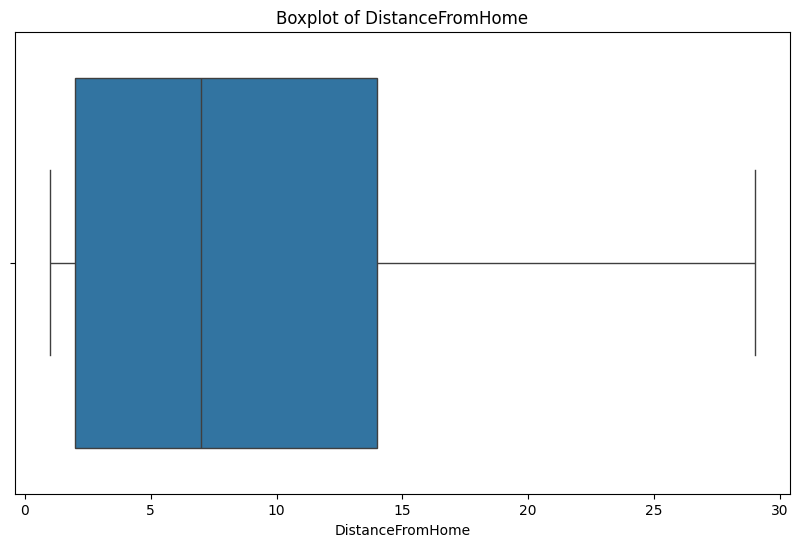

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='DistanceFromHome', hue='Attrition', data=data)
plt.title('Distribution of DistanceFromHome by Attrition')
plt.xlabel('DistanceFromHome')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')
plt.tight_layout()
plt.show()

# Boxplot for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['DistanceFromHome'])
plt.title('Boxplot of DistanceFromHome')
plt.show()



*   Most of the employees are living within 10kms radius from the organisation.As the distance from the organisation increases, Attrition Rate also increases.



# **(6)DISTRIBUTION OF EDUCATIONFIELD IN ATTRITION**

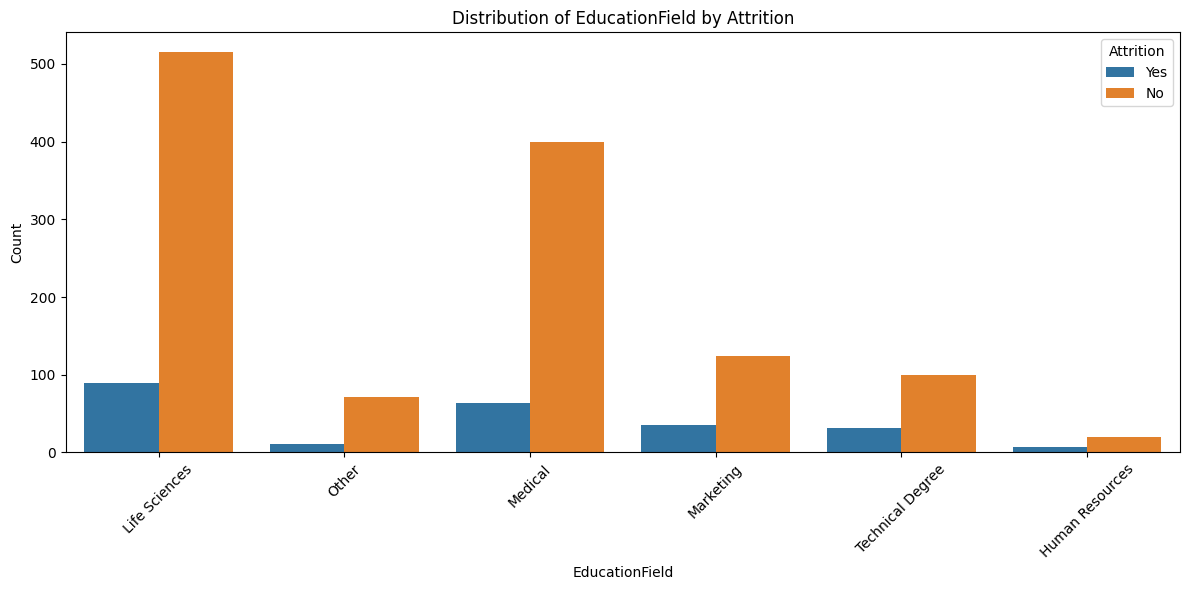

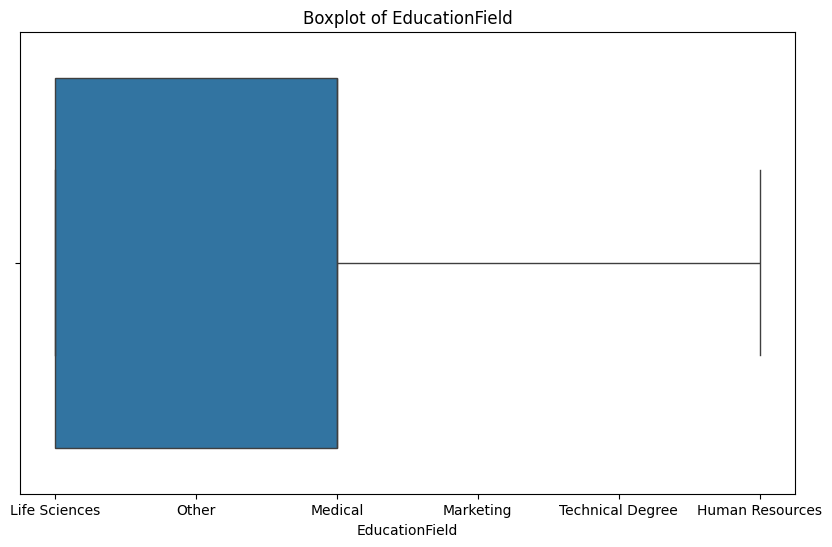

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='EducationField', hue='Attrition', data=data)
plt.title('Distribution of EducationField by Attrition')
plt.xlabel('EducationField')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')
plt.tight_layout()
plt.show()

# Boxplot for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['EducationField'])
plt.title('Boxplot of EducationField')
plt.show()



*  Most of the employees are either from Life Science or Medical Education Field. Very few employees are from Human Resources Education Field. Education Fields like Human Resources, Technical, Marketing is having very high attrition rate. This may be because of work load becuase there are very few employees in these education fields compared to education field with less attrition rate.



# **(7)Employee Count VS Attrition**

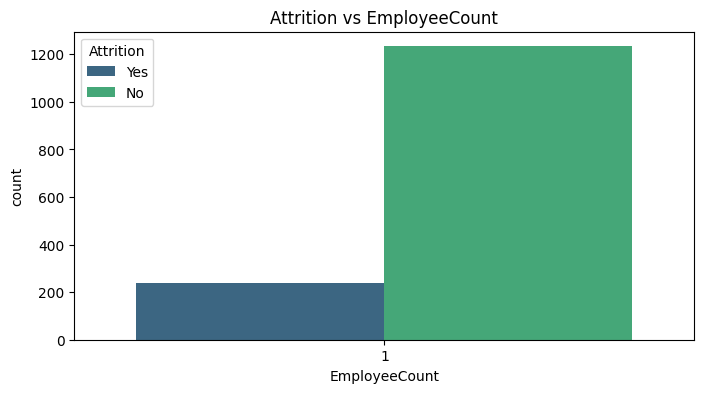

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='EmployeeCount', hue='Attrition', data=data, palette='viridis')
plt.title('Attrition vs EmployeeCount')
plt.show()



*   Since it likely does not vary, it may not directly impact attrition and may not yield meaningful insights in this context.



# **(8)Employee Number VS Attrition**

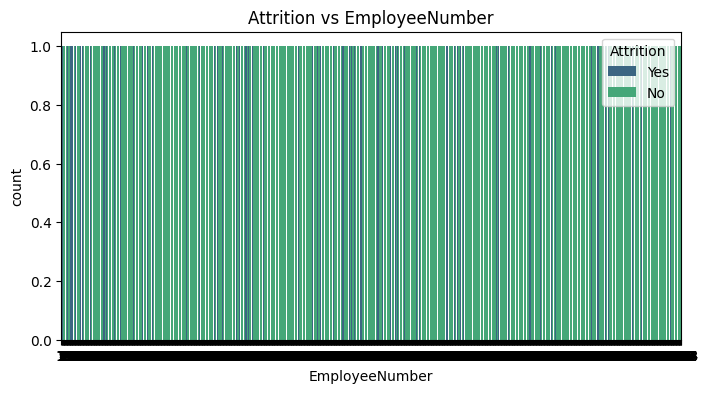

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(x='EmployeeNumber', hue='Attrition', data=data, palette='viridis')
plt.title('Attrition vs EmployeeNumber')
plt.show()



*  Unique identifier for employees.so no big impact on attrition




# **(9)Environment Satisfaction vs Attrition**

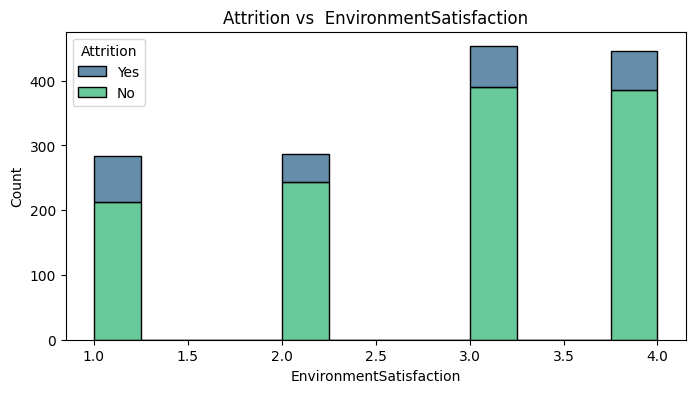

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=data, x= 'EnvironmentSatisfaction', hue='Attrition', multiple='stack', palette='viridis')
plt.title('Attrition vs  EnvironmentSatisfaction')
plt.show()



*  Lower satisfaction correlates with higher attrition.



# **(10)Gender v/s Attrition**

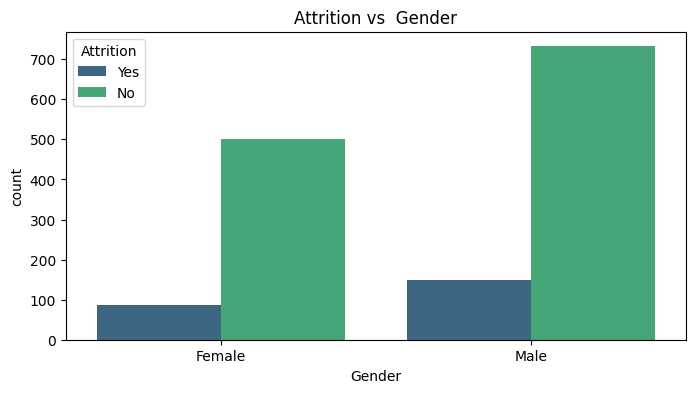

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x= 'Gender', hue='Attrition', data=data, palette='viridis')
plt.title('Attrition vs  Gender')
plt.show()



*   Male employees are higher in propotion than female.so
Atrition in male is higher compared to females
   



# **(11)Hourly Rate VS Attrition**

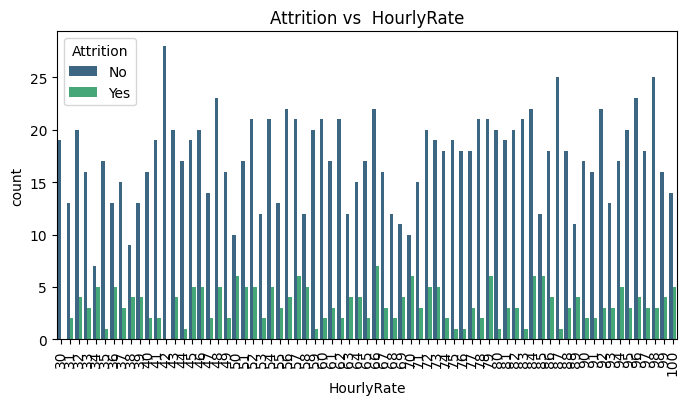

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x= 'HourlyRate', hue='Attrition', data=data, palette='viridis')
plt.title('Attrition vs  HourlyRate')
plt.xticks(rotation=90)
plt.show()





*  No significant correlation observed.





# **(12)Job Involvement VS Attrition**

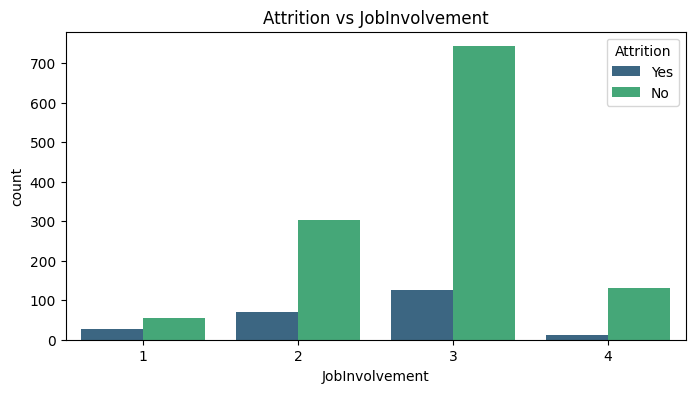

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='JobInvolvement', hue='Attrition', data=data, palette='viridis')
plt.title('Attrition vs JobInvolvement')
plt.show()



*   lower involvement correlates with higher attrition.



# **(13)Job Level VS Attrition**

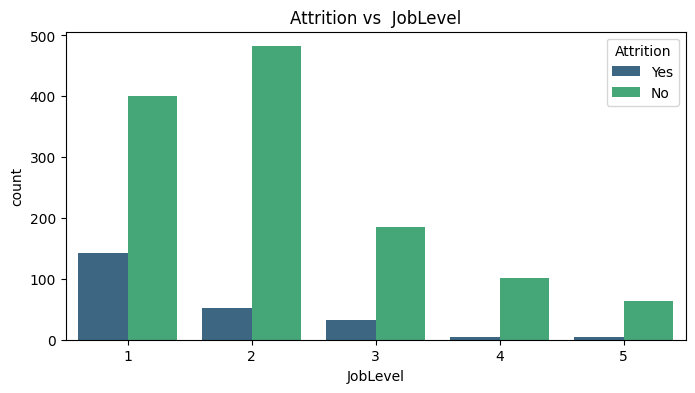

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x= 'JobLevel', hue='Attrition', data=data, palette='viridis')
plt.title('Attrition vs  JobLevel')
plt.show()



*   Most of the employees in the organization are at Entry Level or Junior Level. Highest Attrition is at the Entry Level



# **(14)JobLevel To NumcompaniesWork**

In [ ]:
columns_of_interest = ['JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
                       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked']

 a)Create a pie chart for each categorical column

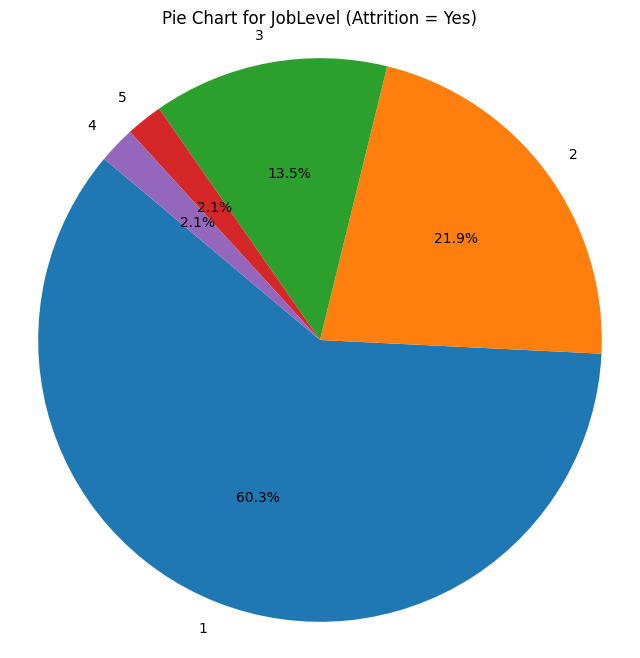

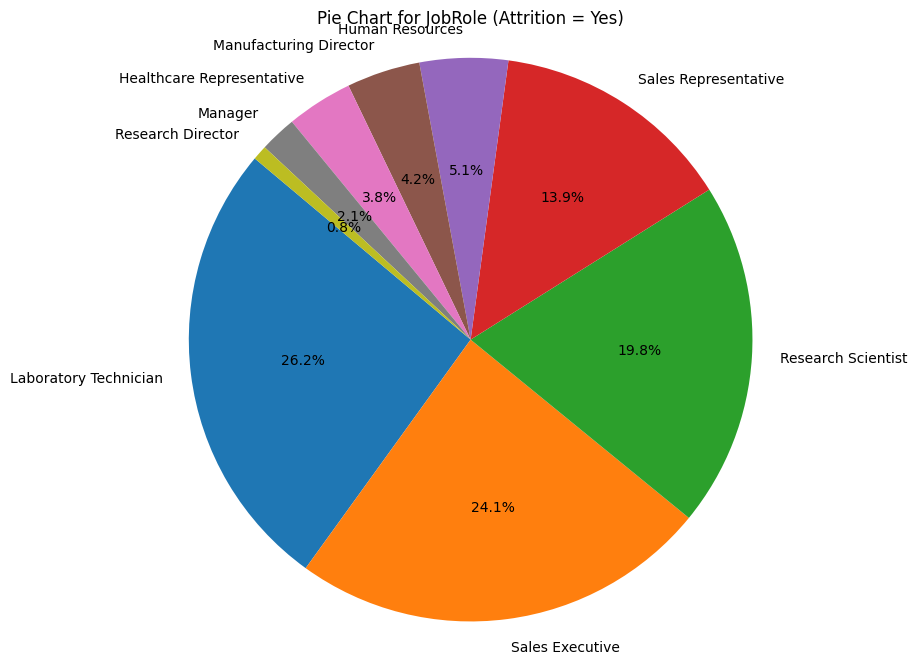

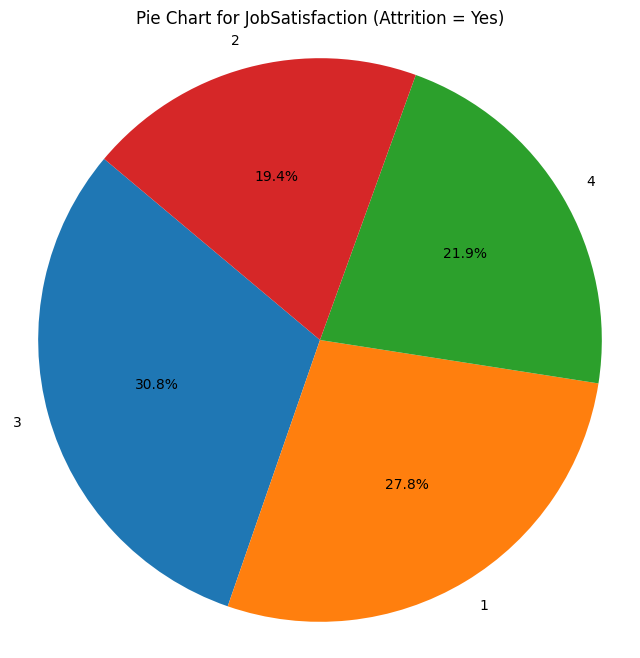

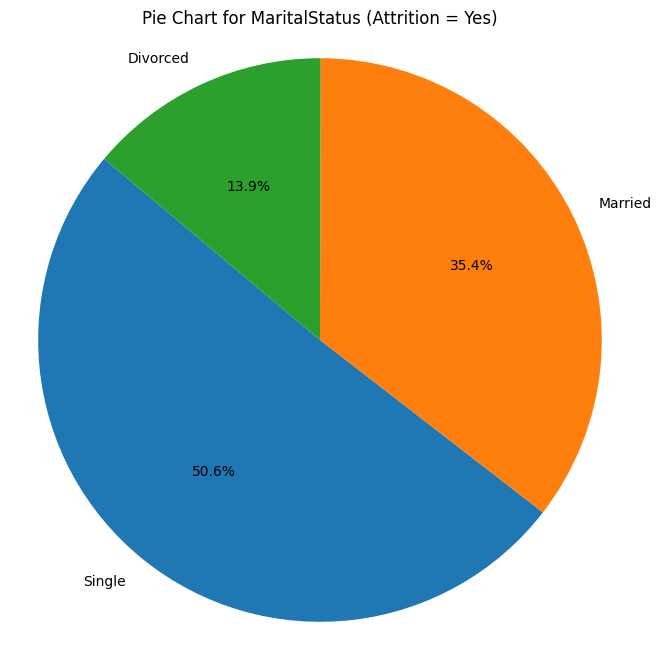

In [ ]:
for col in ['JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus']:
    plt.figure(figsize=(8, 8))
    value_counts_yes = data[data['Attrition'] == 'Yes'][col].value_counts()
    plt.pie(value_counts_yes, labels=value_counts_yes.index, autopct="%1.1f%%", startangle=140)
    plt.title(f"Pie Chart for {col} (Attrition = Yes)")
    plt.axis('equal')
    plt.show()



*   JobLevel:  Higher job levels tend to have lower attrition rates.

*   JobRole:  Certain roles like Sales Executive have higher attrition.
*   JobSatisfaction:  Lower satisfaction correlates with higher attrition.


*   MaritalStatus:  Single employees have higher attrition rates.



b)Create a boxplot for each numerical column

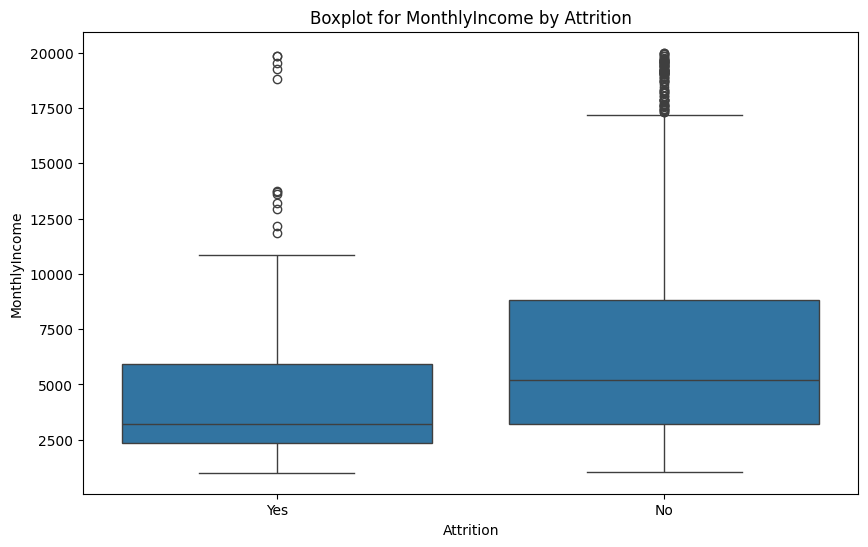

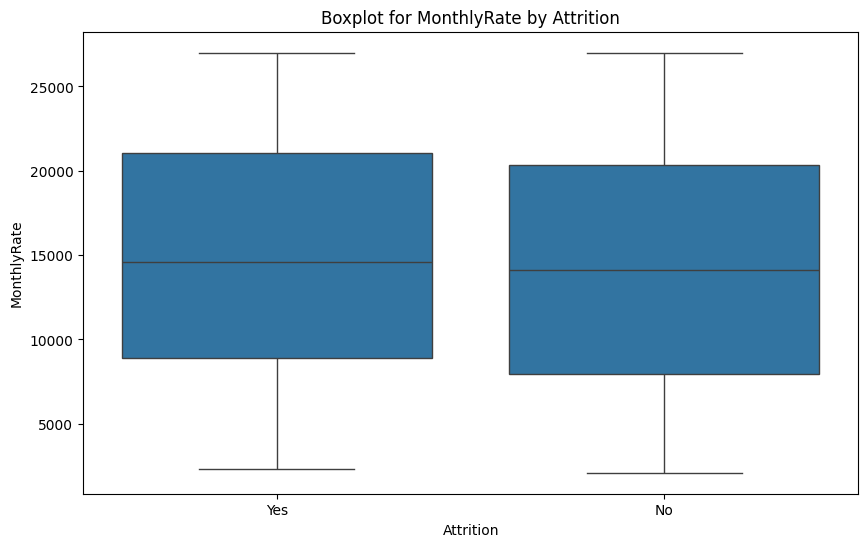

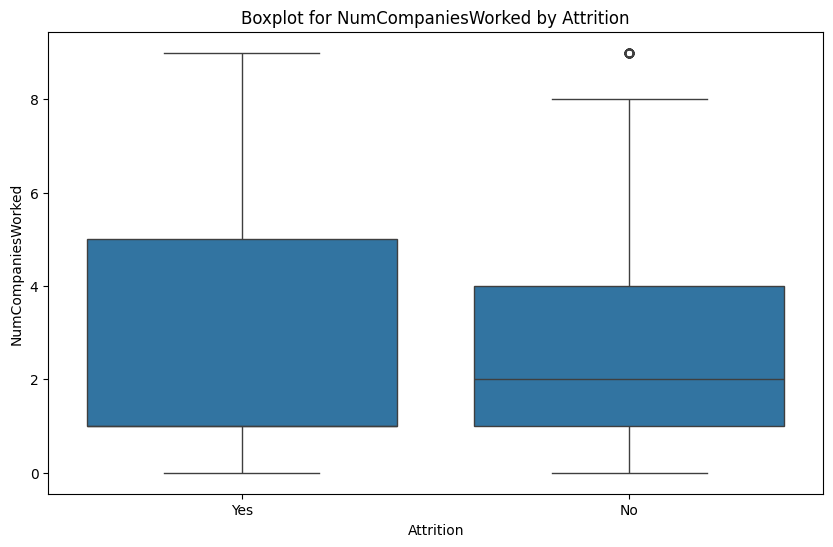

In [ ]:
 for col in ['MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Attrition', y=col, data=data)
    plt.title(f"Boxplot for {col} by Attrition")
    plt.xlabel('Attrition')
    plt.ylabel(col)
    plt.show()



*   MonthlyIncome: Higher income tends to correlate with lower attrition.

*   MonthlyRate :  No significant correlation observed.
*   NumCompaniesWorked :  Employees who worked at more companies tend to have higher attrition.



# **(15)Effect of Over18 on Attrition**



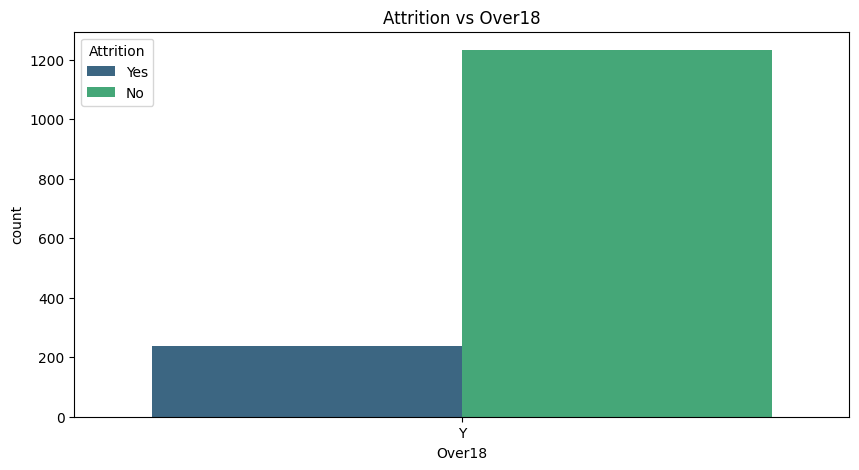

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Over18', hue='Attrition', data=data, palette='viridis')
plt.title('Attrition vs Over18')
plt.show()




*  This column likely has a single value ('Y') since it's standard for employees to be over 18.so there is no big effect on attrition due to over 18



# **(16)Effect of OverTime on Attrition**

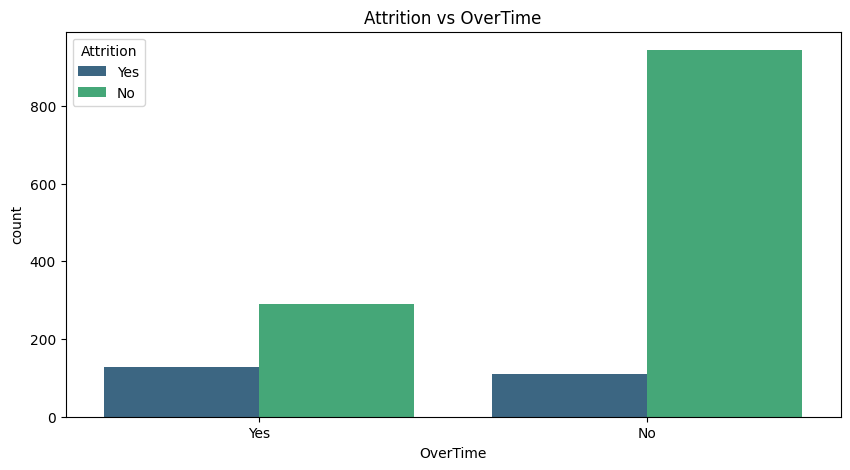

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='OverTime',hue='Attrition',data=data, palette='viridis')
plt.title('Attrition vs OverTime')
plt.show()



*  Employees who work overtime have a higher attrition rate compared to those who do not work overtime. This indicates that working overtime might be a significant factor contributing to employee attrition.



# **(17)Effect of PercentSalaryHike on Attrition**

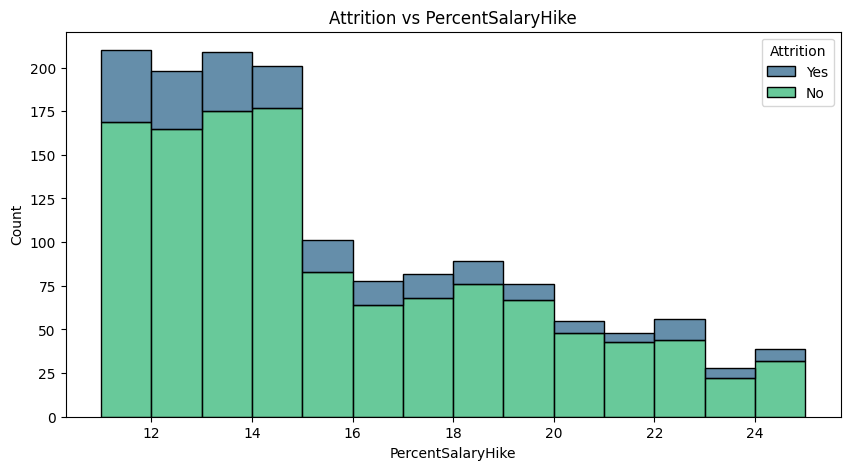

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='PercentSalaryHike', hue='Attrition', multiple='stack', palette='viridis')
plt.title('Attrition vs PercentSalaryHike')
plt.show()



*   Very Few employees are getting a high percent salary hike.

*   As the amount of percent salary increases the attrition rate decreases



# **(18)Effect of PerformanceRating on Attrition**

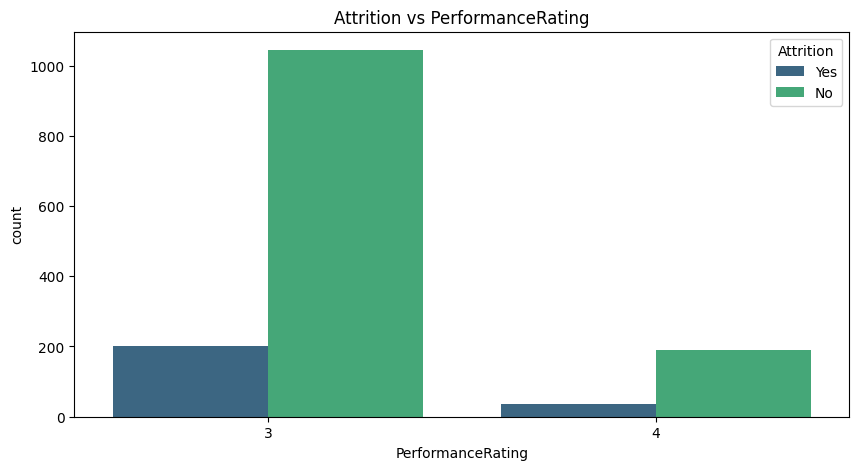

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='PerformanceRating', hue='Attrition', data=data, palette='viridis')
plt.title('Attrition vs PerformanceRating')
plt.show()



*   Majority of employees have excellent performance rating.This indicates that performance ratings alone may not be a decisive factor in employee attrition.



# **(19)Effect of RelationshipSatisfaction on Attrition**

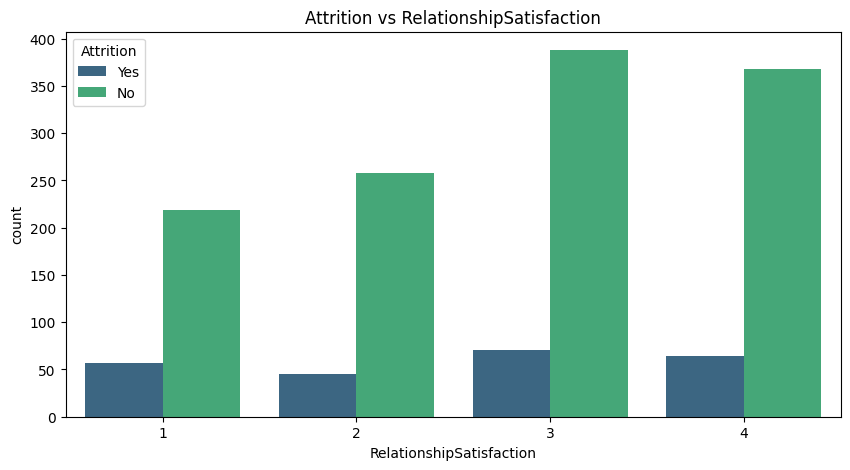

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=data, palette='viridis')
plt.title('Attrition vs RelationshipSatisfaction')
plt.show()



* Employees with lower relationship satisfaction ratings have higher attrition rates. This suggests that relationship satisfaction with colleagues and management might significantly influence an employee's decision to stay or leave the company.



# **(20)Effect of StandardHours on Attrition**

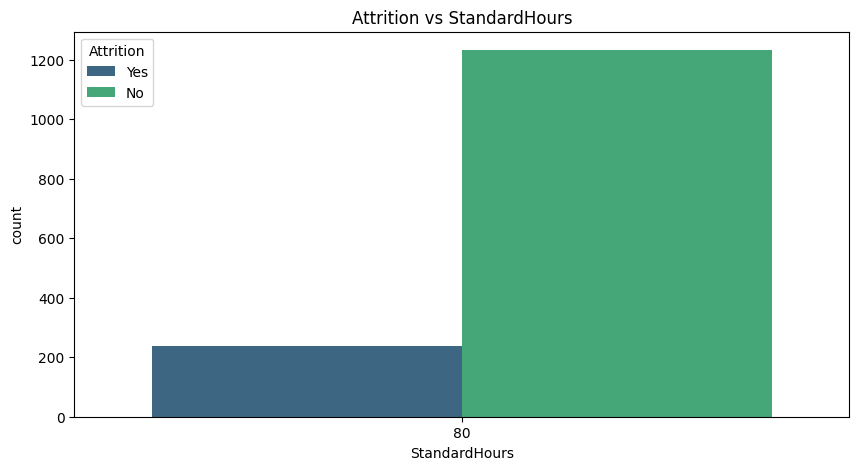

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='StandardHours', hue='Attrition', data=data, palette='viridis')
plt.title('Attrition vs StandardHours')
plt.show()



*   This column likely has a single value (80) since there is no big effect on attrition due to standardhours



# **(21)Effect of StockOptionLevel on Attrition**

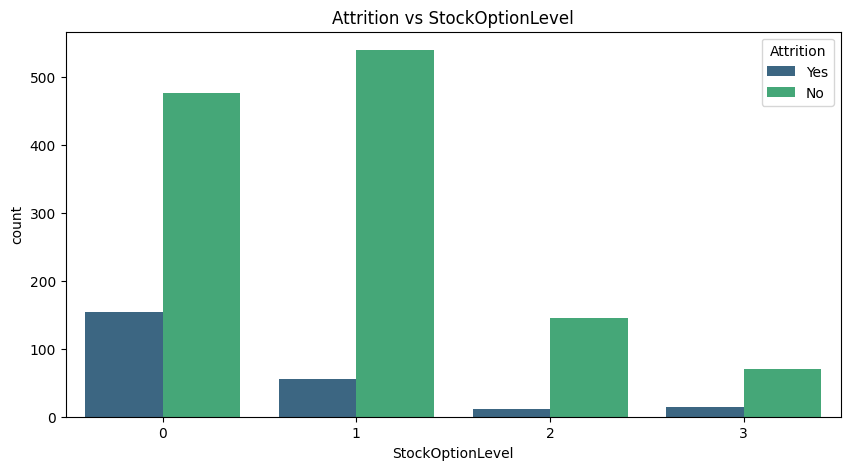

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='StockOptionLevel', hue='Attrition', data=data, palette='viridis')
plt.title('Attrition vs StockOptionLevel')
plt.show()



*   Employees with no stock options (level 0) have a higher attrition rate compared to those with stock options. This suggests that providing stock options can be a beneficial retention tool, potentially reducing employee attrition.



# **(22)TotalWorkingYears to YearsWithCurrManager**

In [ ]:
cols_ed = ['TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                       'YearsWithCurrManager']

In [ ]:
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)


In [ ]:
univariate_stats = {
    'TotalWorkingYears': data['TotalWorkingYears'].describe(),
    'TrainingTimesLastYear': data['TrainingTimesLastYear'].describe(),
    'WorkLifeBalance': data['WorkLifeBalance'].describe(),
    'YearsAtCompany': data['YearsAtCompany'].describe(),
    'YearsInCurrentRole': data['YearsInCurrentRole'].describe(),
    'YearsSinceLastPromotion': data['YearsSinceLastPromotion'].describe(),
    'YearsWithCurrManager': data['YearsWithCurrManager'].describe()
}

In [ ]:
univariate_stats

{'TotalWorkingYears': count    1470.000000
 mean       11.279592
 std         7.780782
 min         0.000000
 25%         6.000000
 50%        10.000000
 75%        15.000000
 max        40.000000
 Name: TotalWorkingYears, dtype: float64,
 'TrainingTimesLastYear': count    1470.000000
 mean        2.799320
 std         1.289271
 min         0.000000
 25%         2.000000
 50%         3.000000
 75%         3.000000
 max         6.000000
 Name: TrainingTimesLastYear, dtype: float64,
 'WorkLifeBalance': count    1470.000000
 mean        2.761224
 std         0.706476
 min         1.000000
 25%         2.000000
 50%         3.000000
 75%         3.000000
 max         4.000000
 Name: WorkLifeBalance, dtype: float64,
 'YearsAtCompany': count    1470.000000
 mean        7.008163
 std         6.126525
 min         0.000000
 25%         3.000000
 50%         5.000000
 75%         9.000000
 max        40.000000
 Name: YearsAtCompany, dtype: float64,
 'YearsInCurrentRole': count    1470.000000
 m

# **Distribution of TotalWorkingYears**

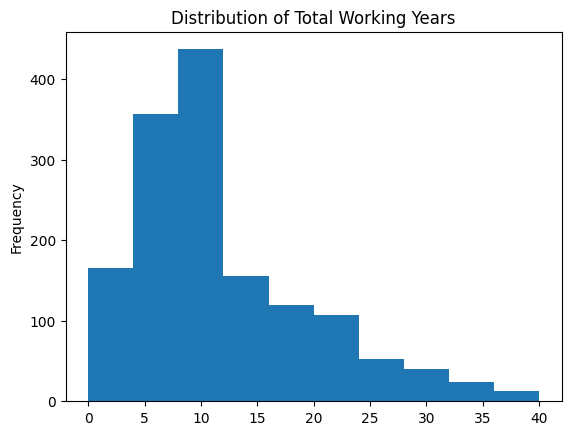

In [ ]:
# Summary statistics
total_working_years_stats = data['TotalWorkingYears'].describe()

# Distribution plot
total_working_years_plot = data['TotalWorkingYears'].plot(kind='hist', title='Distribution of Total Working Years')




*   More working years generally correlate with lower attrition.



# **Distribution of TrainingTimesLastYear**

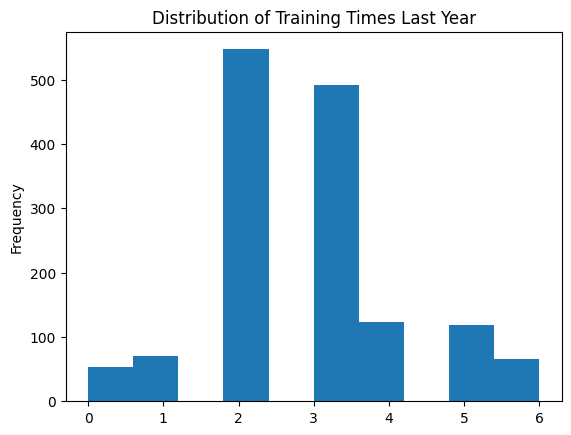

In [ ]:
# Summary statistics
training_times_last_year_stats = data['TrainingTimesLastYear'].describe()

# Distribution plot
training_times_last_year_plot = data['TrainingTimesLastYear'].plot(kind='hist', title='Distribution of Training Times Last Year')




*   More training correlates with lower attrition.



# **Distribution of WorklifeBalance**

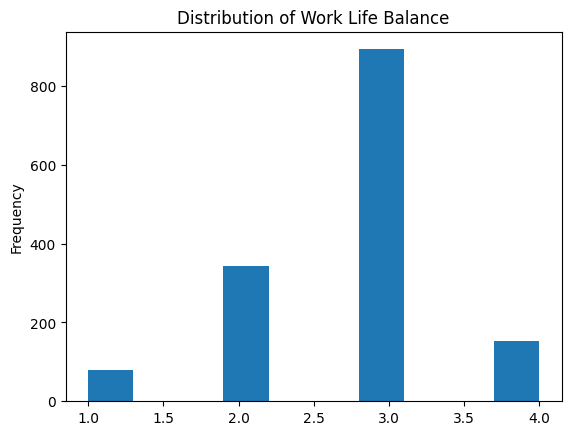

In [ ]:
# Summary statistics
work_life_balance_stats = data['WorkLifeBalance'].describe()

# Distribution plot
work_life_balance_plot = data['WorkLifeBalance'].plot(kind='hist', title='Distribution of Work Life Balance')



*    Lower work-life balance correlates with higher attrition.


# **Distribution of YearsAtCompany**

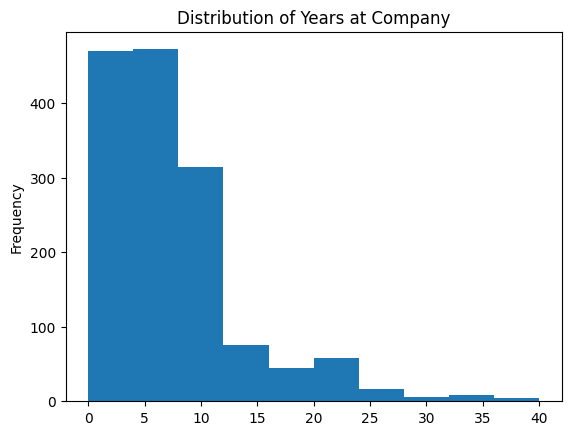

In [ ]:
# Summary statistics
years_at_company_stats = data['YearsAtCompany'].describe()

# Distribution plot
years_at_company_plot = data['YearsAtCompany'].plot(kind='hist', title='Distribution of Years at Company')



*  Fewer years at the company correlate with higher attrition.



# **Distribution of YearsInCurrentRole**





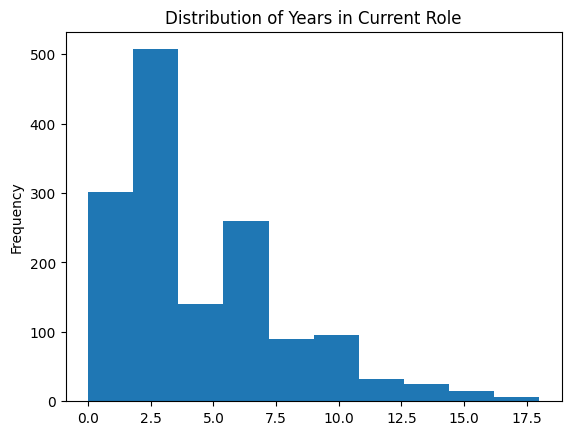

In [ ]:
# Summary statistics
years_in_current_role_stats = data['YearsInCurrentRole'].describe()

# Distribution plot
years_in_current_role_plot = data['YearsInCurrentRole'].plot(kind='hist', title='Distribution of Years in Current Role')



*   Fewer years in the current role correlate with higher attrition.



# **Distribution of YearsSinceLastPromotion**

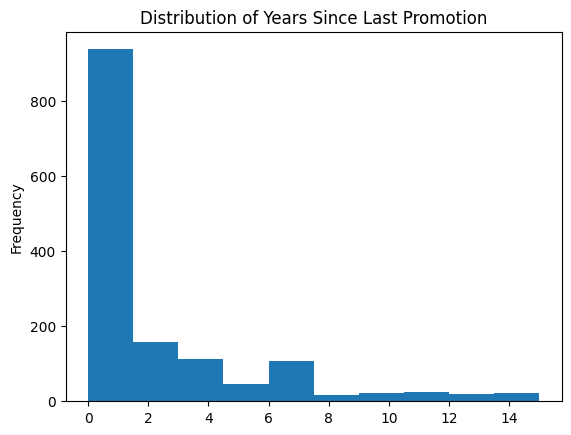

In [ ]:
# Summary statistics
years_since_last_promotion_stats = data['YearsSinceLastPromotion'].describe()

# Distribution plot
years_since_last_promotion_plot = data['YearsSinceLastPromotion'].plot(kind='hist', title='Distribution of Years Since Last Promotion')



*   More years since the last promotion correlate with higher attrition.



# **Distribution of YearsWithCurrManager**

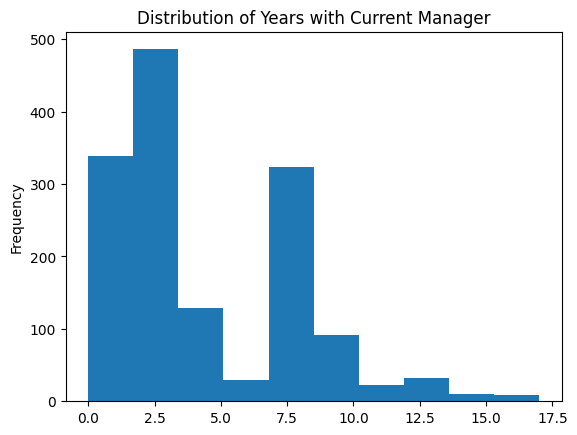

In [ ]:
# Summary statistics
years_with_curr_manager_stats = data['YearsWithCurrManager'].describe()

# Distribution plot
years_with_curr_manager_plot = data['YearsWithCurrManager'].plot(kind='hist', title='Distribution of Years with Current Manager')



*   Fewer years with the current manager correlate with higher attrition.



# Univariate Analysis: Distribution plots


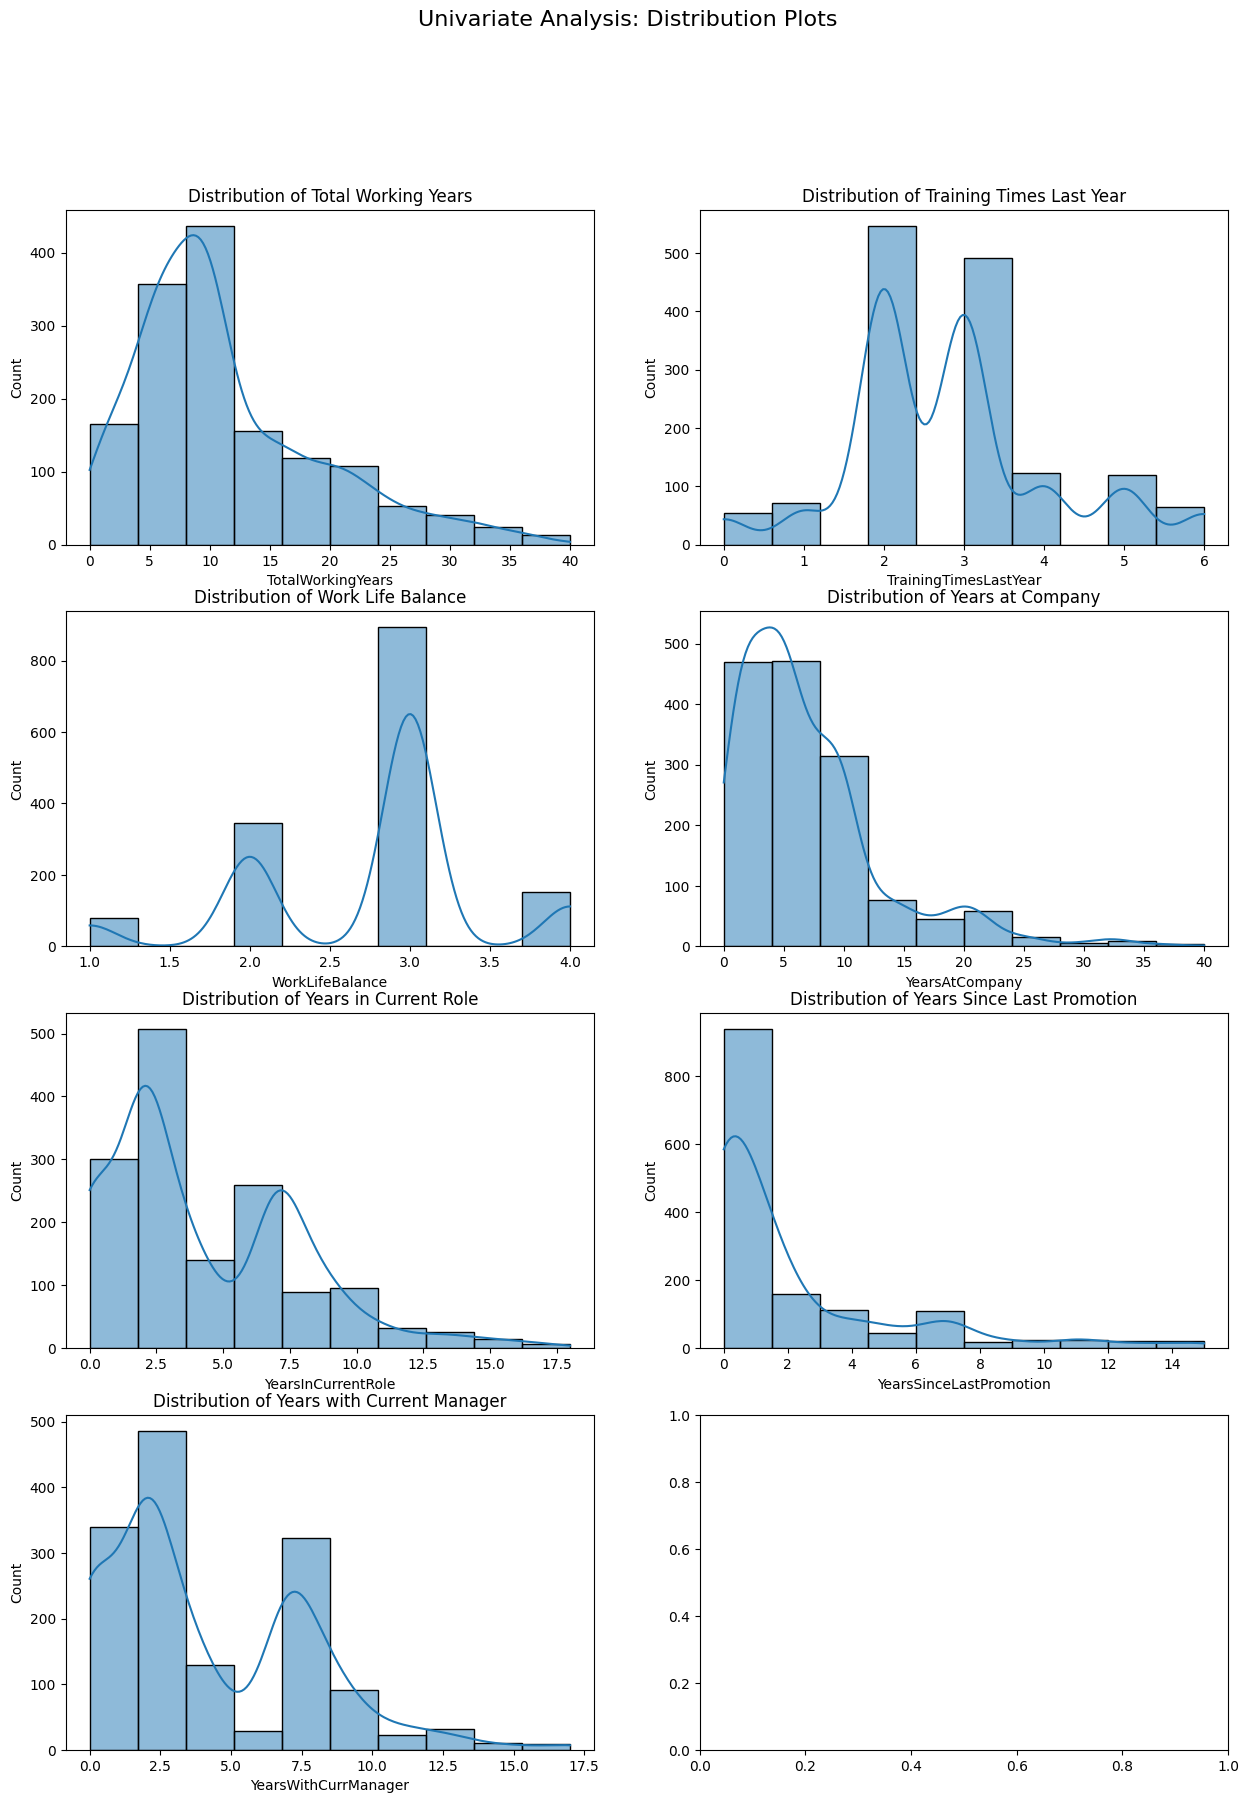

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle('Univariate Analysis: Distribution Plots', fontsize=16)

sns.histplot(data['TotalWorkingYears'], bins=10, ax=axes[0, 0], kde=True).set_title('Distribution of Total Working Years');
sns.histplot(data['TrainingTimesLastYear'], bins=10, ax=axes[0, 1], kde=True).set_title('Distribution of Training Times Last Year');
sns.histplot(data['WorkLifeBalance'], bins=10, ax=axes[1, 0], kde=True).set_title('Distribution of Work Life Balance');
sns.histplot(data['YearsAtCompany'], bins=10, ax=axes[1, 1], kde=True).set_title('Distribution of Years at Company');
sns.histplot(data['YearsInCurrentRole'], bins=10, ax=axes[2, 0], kde=True).set_title('Distribution of Years in Current Role');
sns.histplot(data['YearsSinceLastPromotion'], bins=10, ax=axes[2, 1], kde=True).set_title('Distribution of Years Since Last Promotion');
sns.histplot(data['YearsWithCurrManager'], bins=10, ax=axes[3, 0], kde=True).set_title('Distribution of Years with Current Manager');

# **Bi-variate anlysis**


# **Distribution of department**

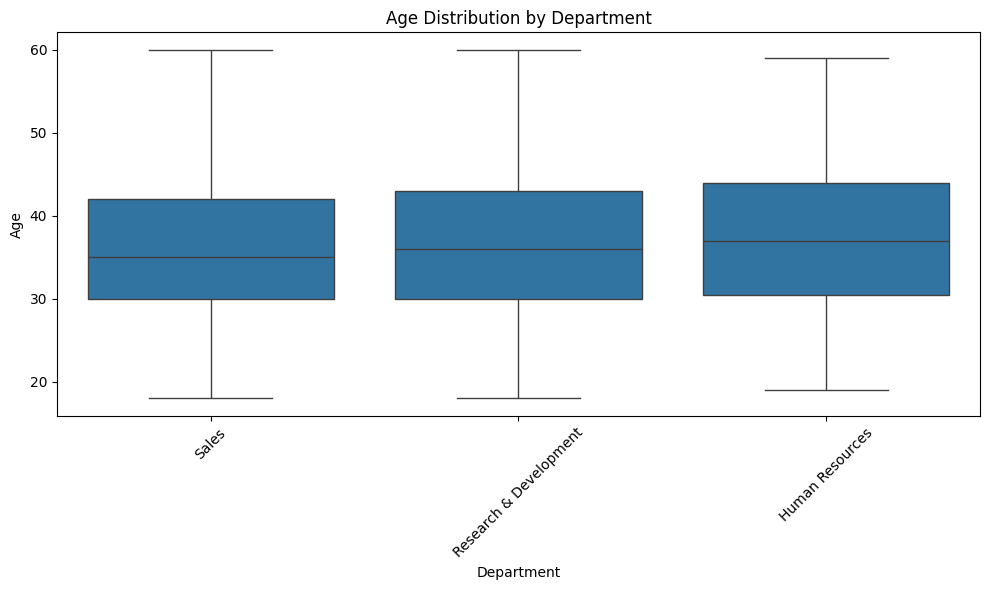

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Age', data=data)
plt.title('Age Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



*   Attrition rates are slightly higher in the Sales department.



# **Distribution of Education**


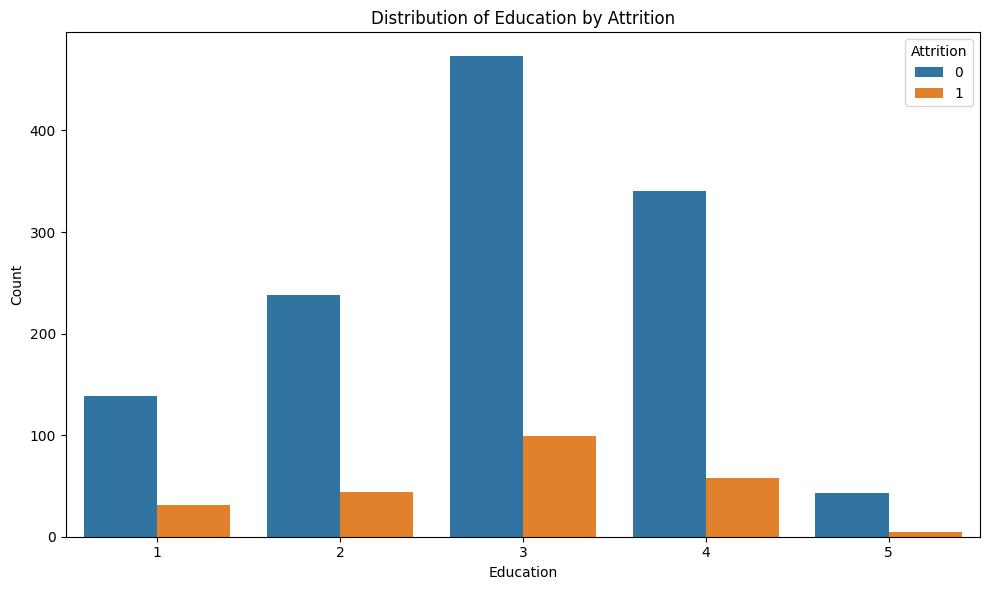

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Attrition', data=data)
plt.title('Distribution of Education by Attrition')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.tight_layout()
plt.show()



*  Higher education levels seem to correlate with lower attrition rates.


# **Countplot of education field**


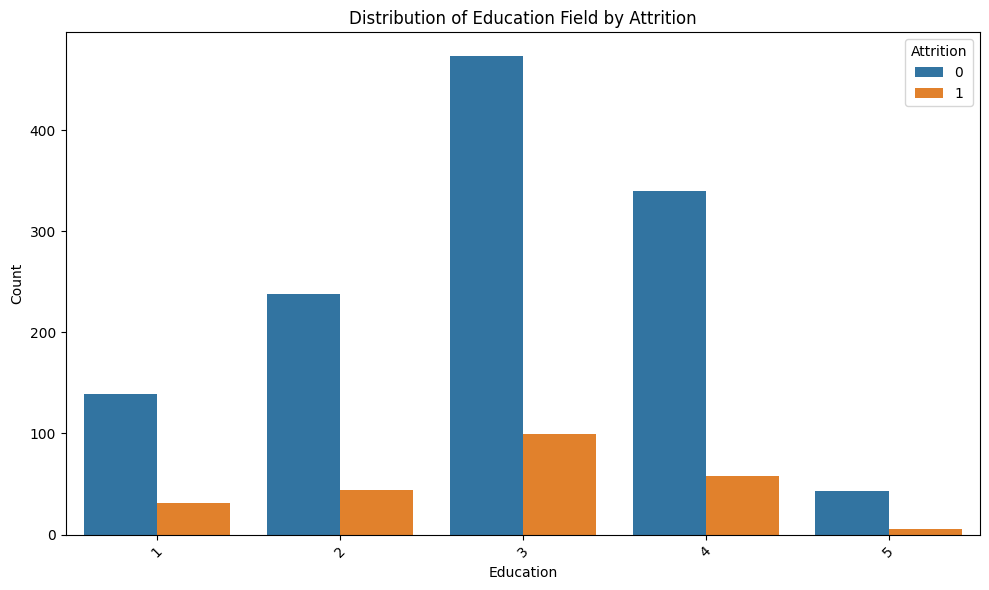

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Attrition', data=data)
plt.title('Distribution of Education Field by Attrition')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



*   Higher attrition is observed in fields like Human Resources and Marketing



# **correlation and regression from employee count to joblevel**



*  Convert Attrition to binary values for correlation and regression analysis




In [ ]:
data['Attrition']=data['Attrition'].apply(lambda x:1 if x=='Yes' else 0)



*   Convert Gender to binary values for correlation and regression analysis



In [ ]:
data['Gender']=data['Gender'].apply(lambda x:1 if x=='Yes' else 0)

In [ ]:
columns_of_inter = [ 'EmployeeCount','EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate','JobInvolvement', 'JobLevel']

# **VISUALISATION**

# **Correlation Heatmap**

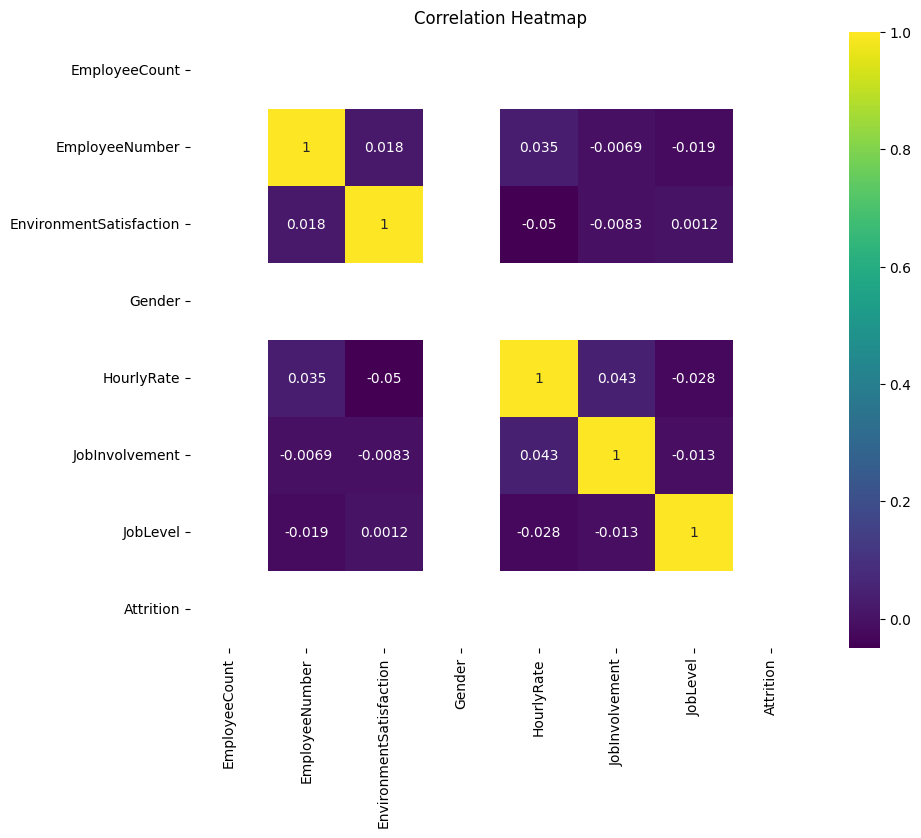

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[columns_of_inter + ['Attrition']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

# **Regression Plot**

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


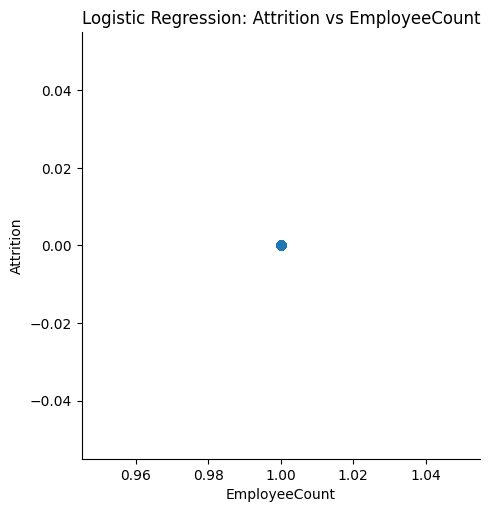

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


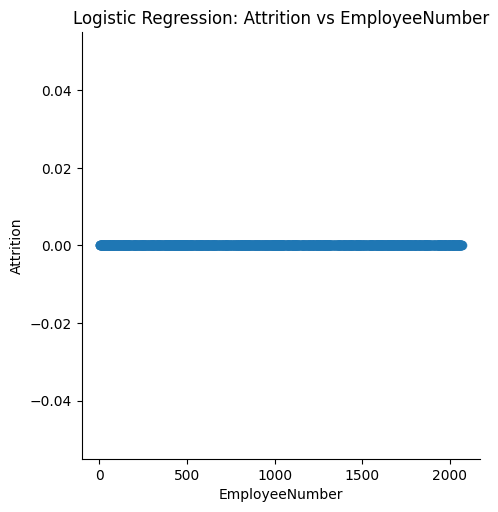

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


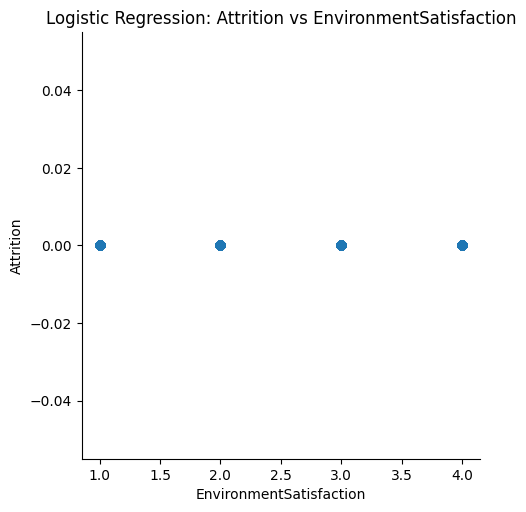

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


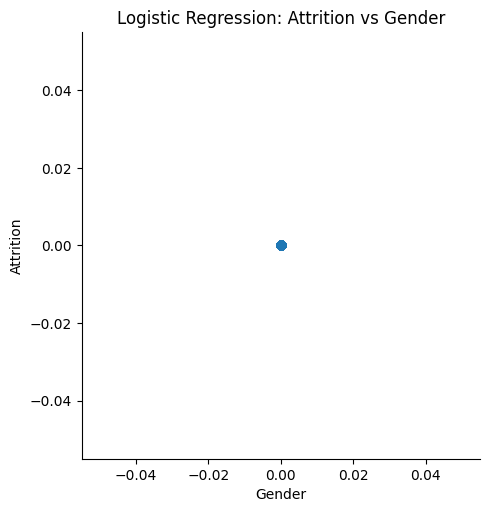

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


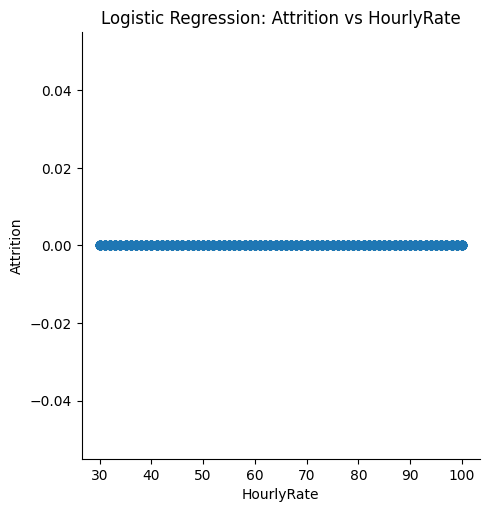

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


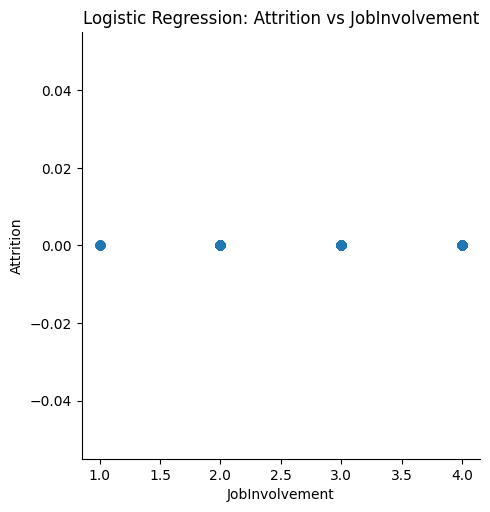

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


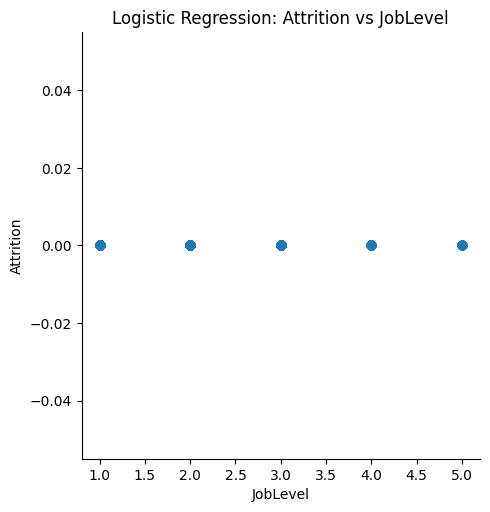

In [ ]:
for column in columns_of_inter:
    sns.lmplot(x=column, y='Attrition', data=data, logistic=True)
    plt.title(f'Logistic Regression: Attrition vs {column}')
    plt.xlabel(column)
    plt.ylabel('Attrition')
    plt.show()



*   Employeecount : have a negative correlation with attrition.so it has no effect on attrition

*   Employee number : have a negative correlation with attrition.so it has no effect on attrition

*   EnvironmentSatisfaction : have a positive correlation with attrition.so it has a effect on attrition

*   Gender : have no significant relation with attrition
*   HourlyRate : have a negative correlation with attrition.so it has no effect on attrition


*   JobInvolment :have a negative correlation with attrition.so it has no effect on attrition


*   JobLevel :have a positive correlation with attrition.so it has a effect on attrition



# **correlation from JobRole to numcompanieswork**



*   Define the columns of interest for analysis



In [ ]:
#num_col =['JobRole', 'JobSatisfaction','MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked']



*  Convert Attrition to binary values for correlation and regression analysis



###Added

In [ ]:
#data['Attrition']=data['Attrition'].apply(lambda x:1 if x=='Yes' else 0)



*   convert JobRole to numeric




In [ ]:
#data['JobRole']=data['JobRole'].apply(lambda x:1 if x=='Yes' else 0)
#data['JobRole'] = data['JobRole'].apply(lambda x: 1 if x == 'Sales Executive' else 2 if x == 'Research Scientist' else 3 if x == 'Laboratory Technician' else 4 if x == 'Manufacturing Director' else 5 if x == 'Healthcare Representative' else 6 if x == 'Manager' else 7 if x == 'Sales Representative' else 8 if x == 'Research Director' else 9)




*  convert MaritalStatus to numeric



In [ ]:
#data['MaritalStatus']=data['MaritalStatus'].apply(lambda x:1 if x=='Yes' else 0)
#data['MaritalStatus'] = data['MaritalStatus'].apply(lambda x: 1 if x == 'Married' else 2 if x == 'Single' else 3 if x == 'Divorced' else 0)


# **VISUALISATION**

# **Correlation Heatmap**

In [ ]:
data.tail()
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

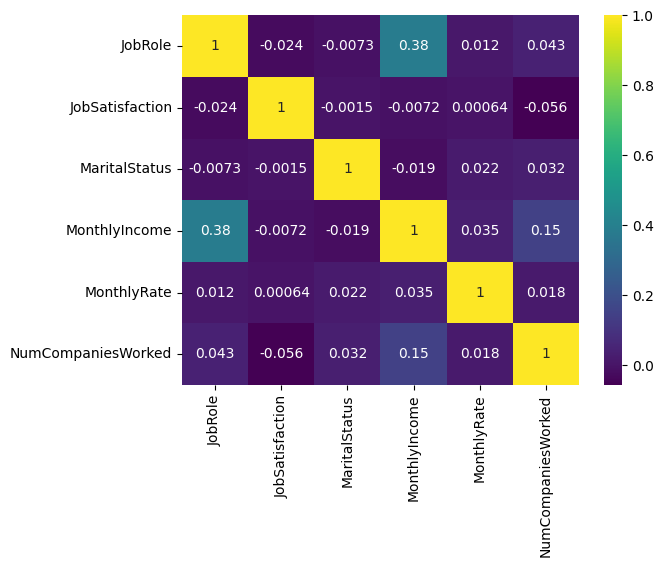

In [ ]:
# prompt: covert string values into float from column jobRole to numcompaniesworked and produce heat map based on that

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Define the columns of interest for analysis
num_col =['JobRole', 'JobSatisfaction','MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked']

# Convert Attrition to binary values for correlation and regression analysis
data['Attrition']=data['Attrition'].apply(lambda x:1 if x=='Yes' else 0)

# Convert JobRole to numeric
data['JobRole'] = data['JobRole'].apply(lambda x: 1 if x == 'Sales Executive' else 2 if x == 'Research Scientist' else 3 if x == 'Laboratory Technician' else 4 if x == 'Manufacturing Director' else 5 if x == 'Healthcare Representative' else 6 if x == 'Manager' else 7 if x == 'Sales Representative' else 8 if x == 'Research Director' else 9)

# Convert MaritalStatus to numeric
data['MaritalStatus'] = data['MaritalStatus'].apply(lambda x: 1 if x == 'Married' else 2 if x == 'Single' else 3 if x == 'Divorced' else 0)

# Convert all columns in num_col to float
for col in num_col:
  data[col] = data[col].astype(float)

# Create a heatmap
sns.heatmap(data[num_col].corr(), annot=True, cmap='viridis')
plt.show()


In [ ]:
#plt.figure(figsize=(10, 8))
#sns.heatmap(data[num_col + ['Attrition']].corr(), annot=True, cmap='viridis')
#plt.title('Correlation Heatmap')
#plt.show()



*   JobRole : job role and monthly income positively correlate 0.38

*   Jobsatisfaction : Negatively correlated with number of companies worked

*   MonthlyRate : Monthly rate and Job satisfaction nearly negative correlated .00064


*   NumCompaniesworked : positevely correlated with monthly income .15






# **correlation and regression from over18 to stockoptionlevel**



*   Convert Attrition to binary values for correlation and regression analysis


In [ ]:
data['Attrition']=data['Attrition'].apply(lambda x:1 if x=='Yes' else 0)



*   Define the columns of interest for analysis



In [ ]:
columns_of_interest = ['Over18','OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction','StandardHours', 'StockOptionLevel']



* convert over18 to numeric



In [ ]:
data['Over18']=data['Over18'].apply(lambda x:1 if x=='Yes' else 0)



*  convert overtime to numeric



In [ ]:
data['OverTime']=data['OverTime'].apply(lambda x:1 if x=='Yes' else 0)

# **VISUALISATION**

# **Correlation Heatmap**

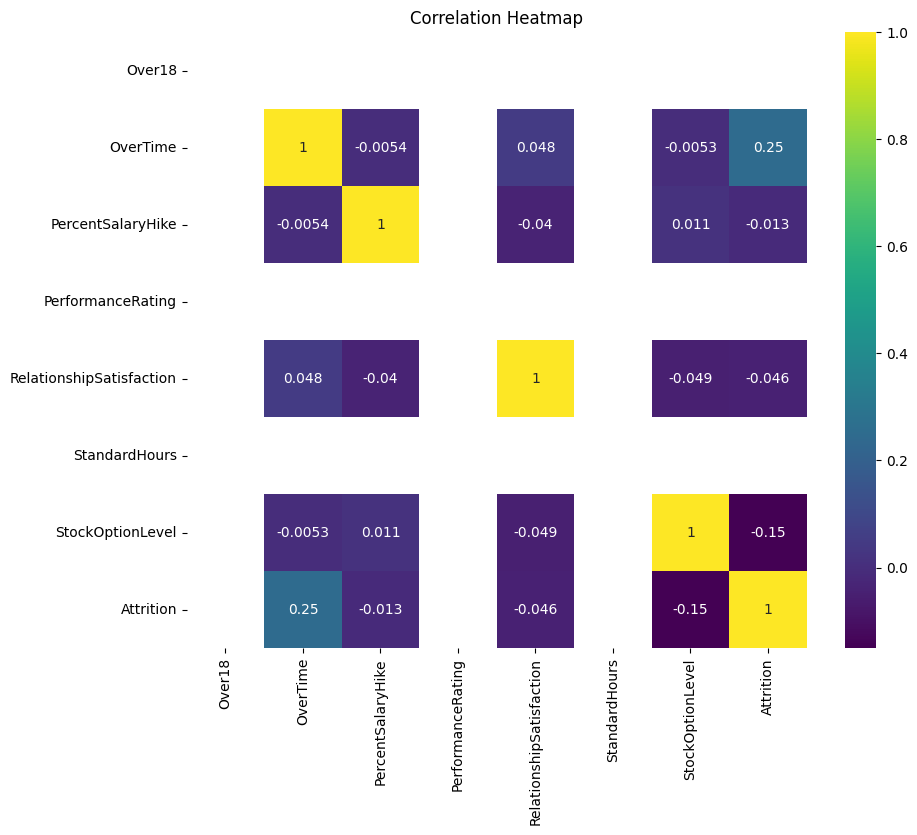

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[columns_of_interest + ['Attrition']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

# **Regression Plot**

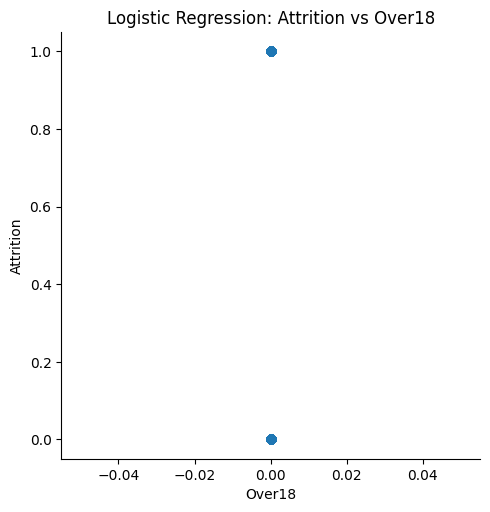

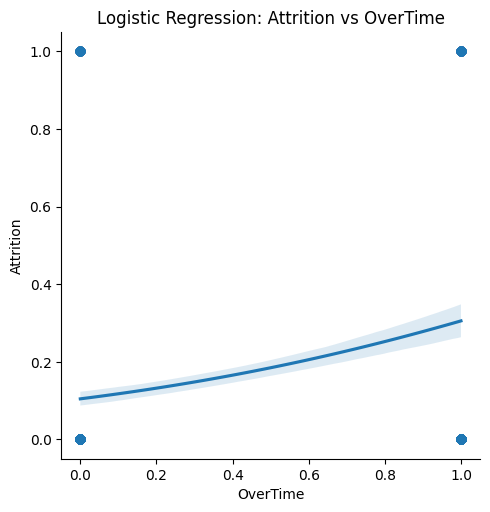

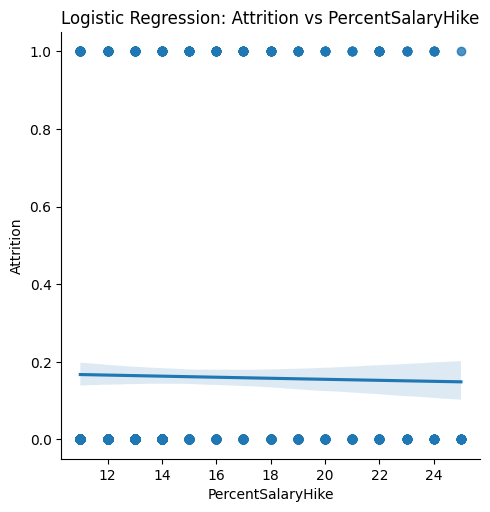

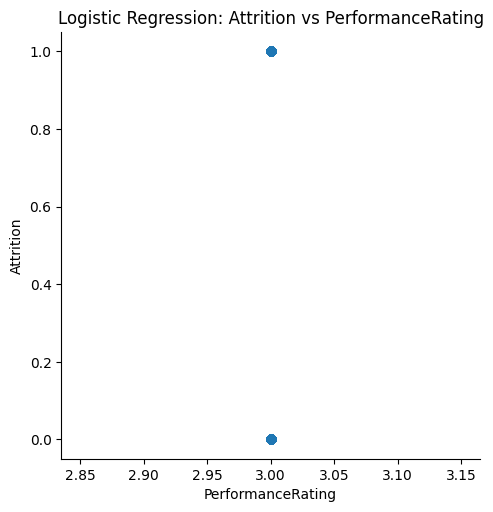

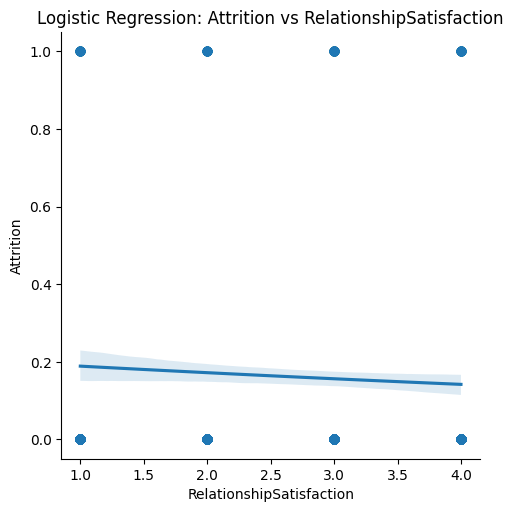

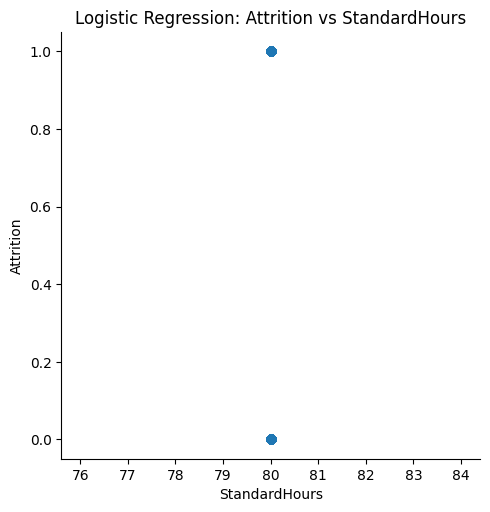

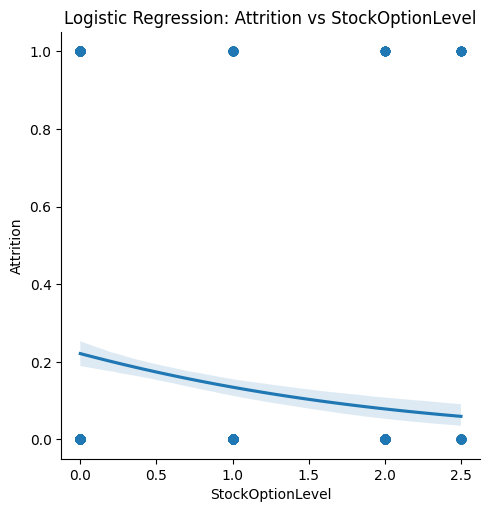

In [ ]:
for column in columns_of_interest:
    sns.lmplot(x=column, y='Attrition', data=data, logistic=True)
    plt.title(f'Logistic Regression: Attrition vs {column}')
    plt.xlabel(column)
    plt.ylabel('Attrition')
    plt.show()

**Over18**: Generally, this would not vary as it is likely a uniform value indicating all employees are over 18.

**OverTime**: This is expected to have a positive correlation with attrition, as employees working overtime might have higher burnout rates.

**PercentSalaryHike**: This could show a positive or negative correlation, depending on whether higher salary hikes retain employees or if they leave regardless.

**PerformanceRating**: A higher performance rating might correlate with lower attrition as high performers might be more engaged or well-compensated.

**RelationshipSatisfaction**: Higher satisfaction is expected to negatively correlate with attrition.

**StandardHours**: Generally, this would not vary as it is likely a uniform value indicating all employees are working for 80 hr per week.

**StockOptionLevel**: Higher stock option levels might negatively correlate with attrition, indicating better retention

# **total working years to YearsWithCurrManager**

In [ ]:
# Calculate correlations
correlation_matrix = data[['TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']].corr()
attrition_correlations = correlation_matrix['Attrition']


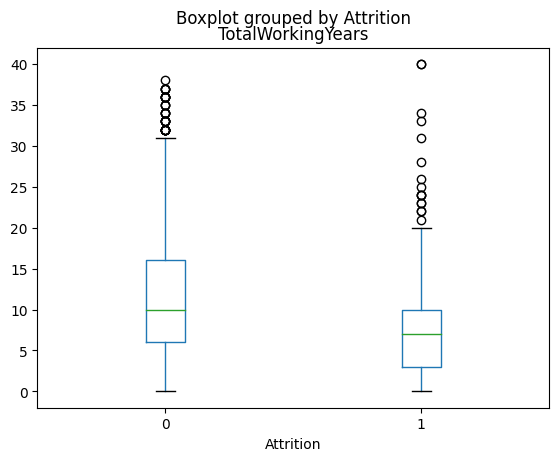

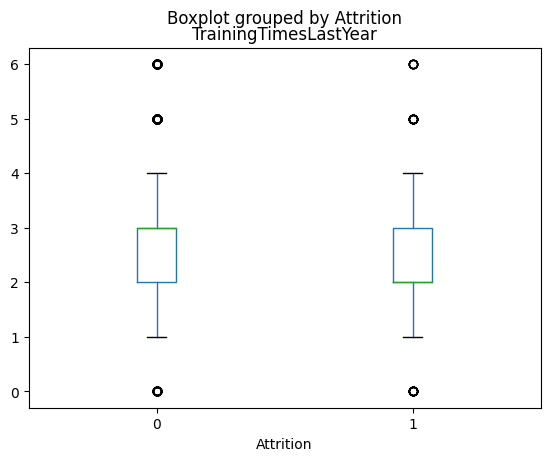

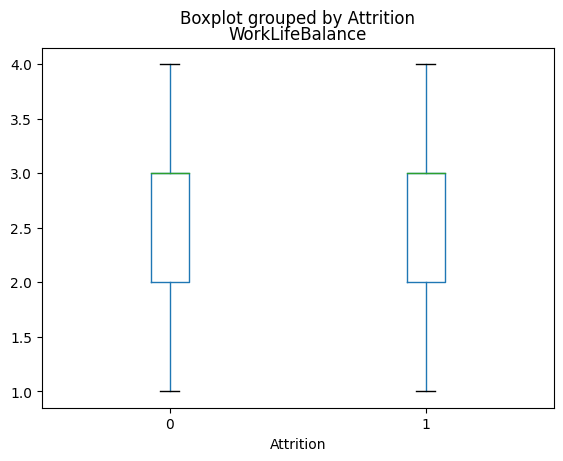

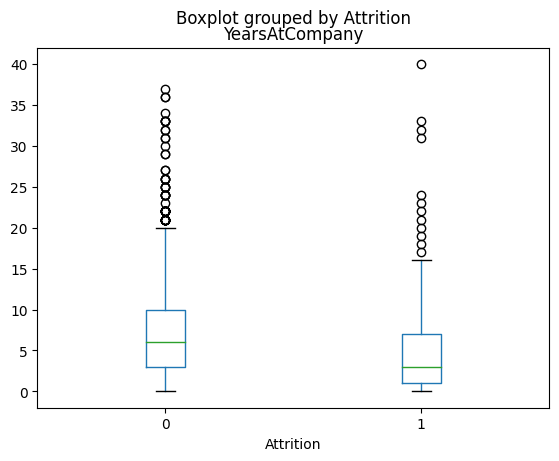

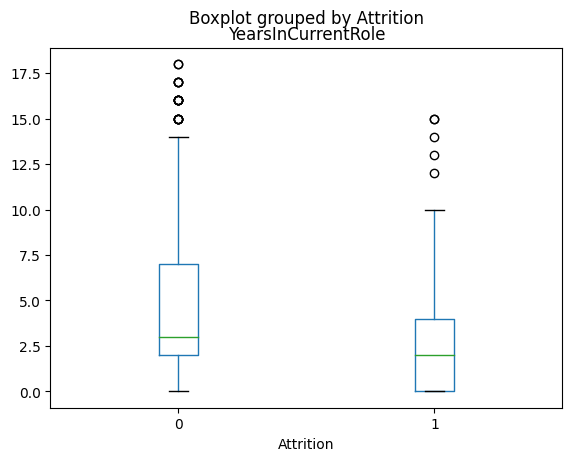

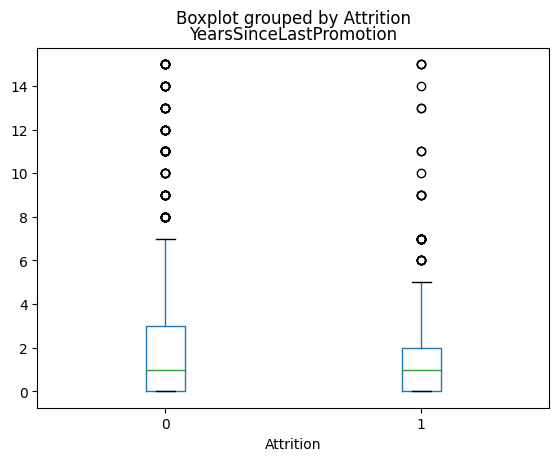

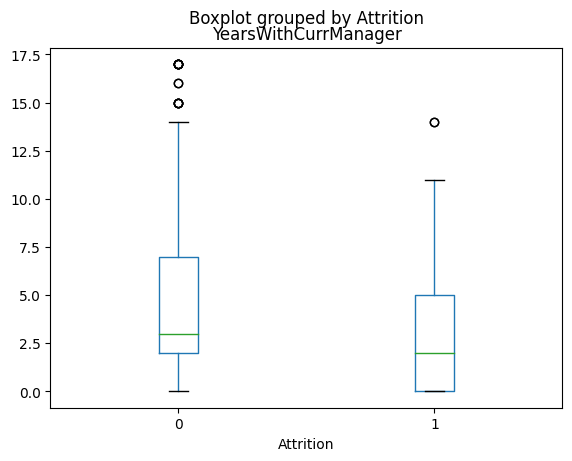

In [ ]:
total_working_years_vs_attrition_plot = data.boxplot(column='TotalWorkingYears', by='Attrition', grid=False)
training_times_last_year_vs_attrition_plot = data.boxplot(column='TrainingTimesLastYear', by='Attrition', grid=False)
work_life_balance_vs_attrition_plot = data.boxplot(column='WorkLifeBalance', by='Attrition', grid=False)
years_at_company_vs_attrition_plot = data.boxplot(column='YearsAtCompany', by='Attrition', grid=False)
years_in_current_role_vs_attrition_plot = data.boxplot(column='YearsInCurrentRole', by='Attrition', grid=False)
years_since_last_promotion_vs_attrition_plot = data.boxplot(column='YearsSinceLastPromotion', by='Attrition', grid=False)
years_with_curr_manager_vs_attrition_plot = data.boxplot(column='YearsWithCurrManager', by='Attrition', grid=False)

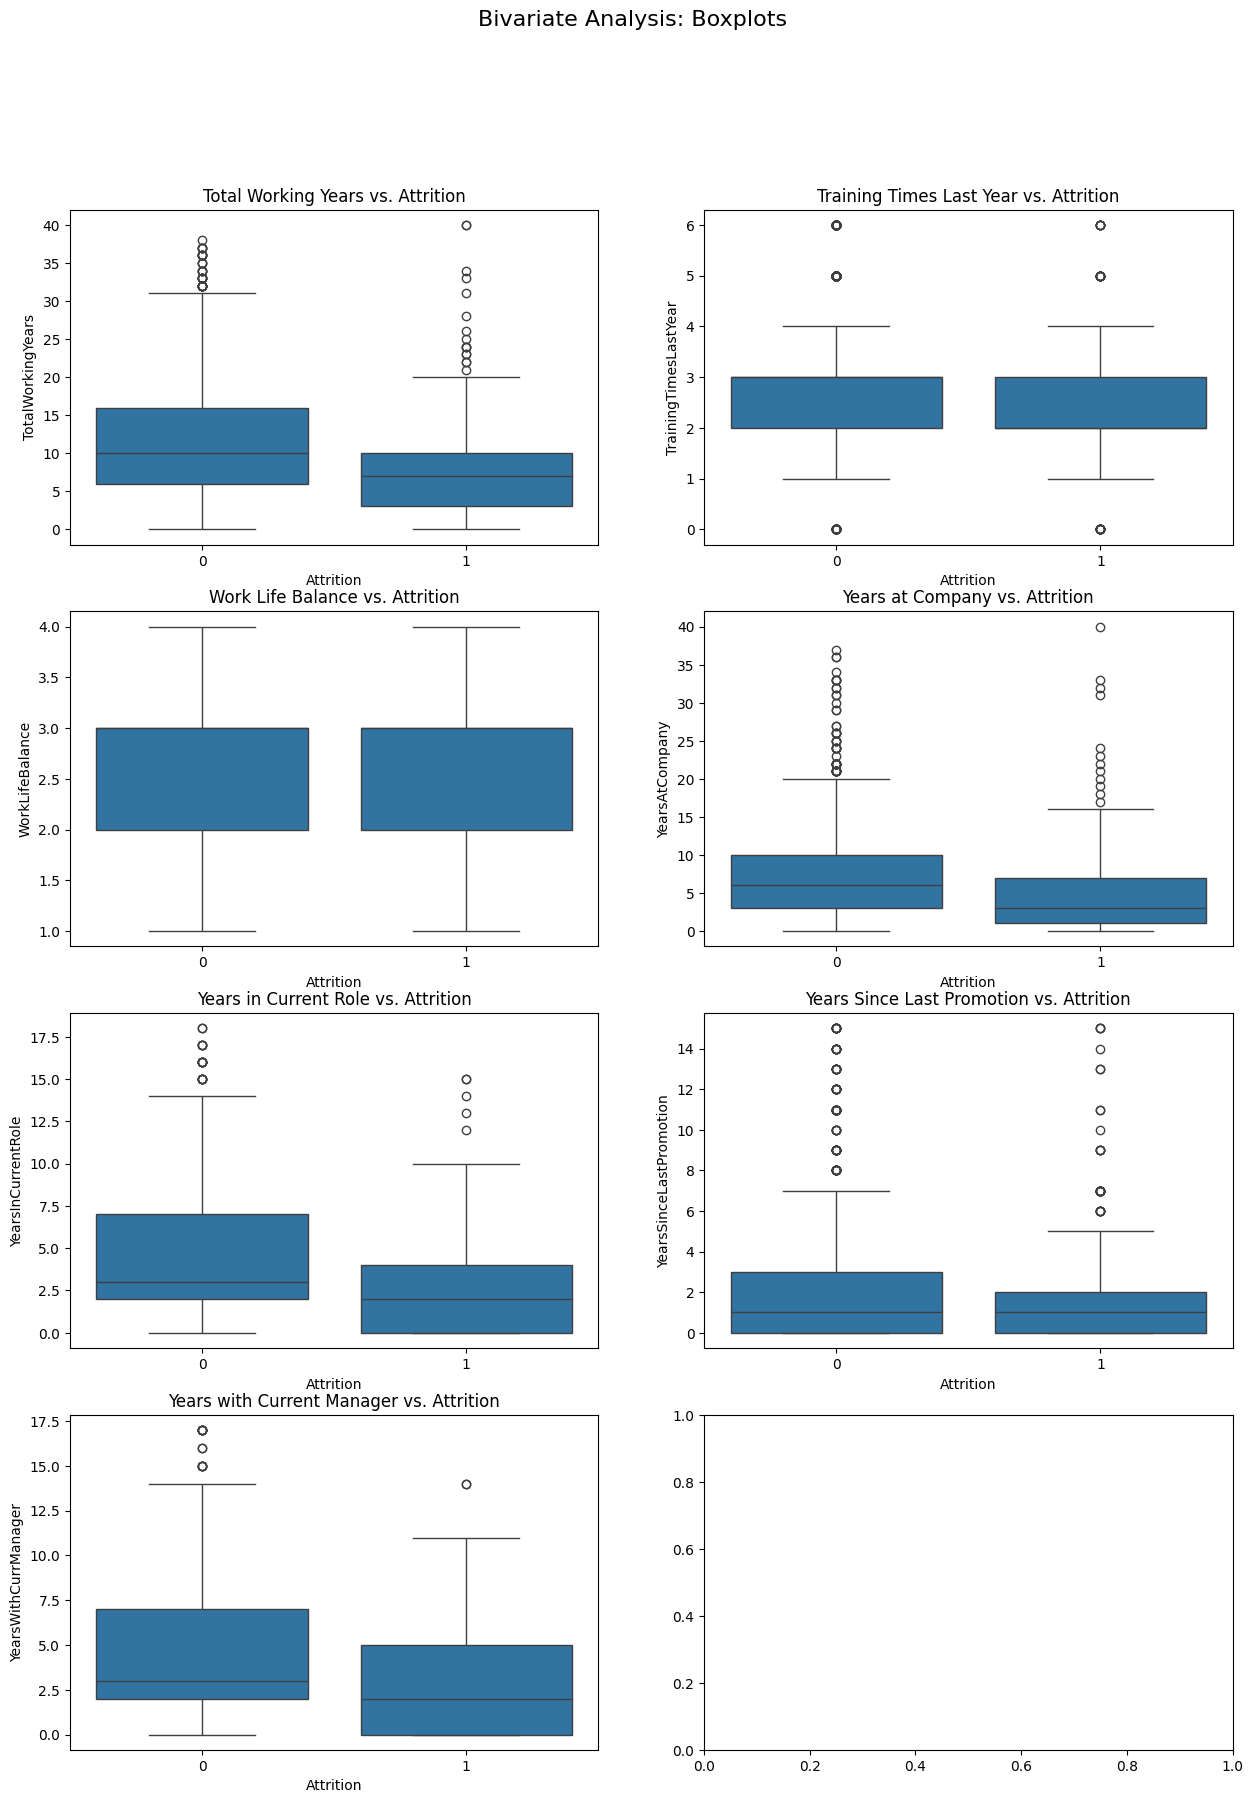

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle('Bivariate Analysis: Boxplots', fontsize=16)

sns.boxplot(x='Attrition', y='TotalWorkingYears', data=data, ax=axes[0, 0]).set_title('Total Working Years vs. Attrition');
sns.boxplot(x='Attrition', y='TrainingTimesLastYear', data=data, ax=axes[0, 1]).set_title('Training Times Last Year vs. Attrition');
sns.boxplot(x='Attrition', y='WorkLifeBalance', data=data, ax=axes[1, 0]).set_title('Work Life Balance vs. Attrition');
sns.boxplot(x='Attrition', y='YearsAtCompany', data=data, ax=axes[1, 1]).set_title('Years at Company vs. Attrition');
sns.boxplot(x='Attrition', y='YearsInCurrentRole', data=data, ax=axes[2, 0]).set_title('Years in Current Role vs. Attrition');
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=data, ax=axes[2, 1]).set_title('Years Since Last Promotion vs. Attrition');
sns.boxplot(x='Attrition', y='YearsWithCurrManager', data=data, ax=axes[3, 0]).set_title('Years with Current Manager vs. Attrition');

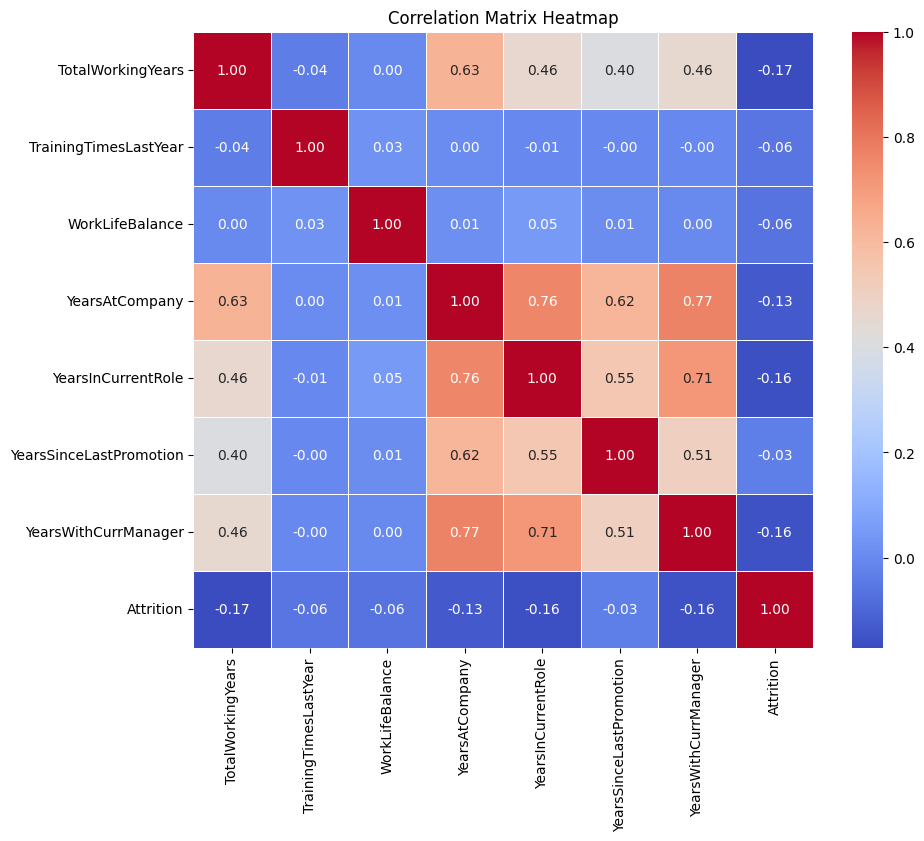

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

TotalWorkingYears: Employees with fewer total working years are more likely to have higher attrition rates. This is indicated by the negative correlation and the boxplot showing lower median total working years for employees who left.

TrainingTimesLastYear: The correlation is weakly negative, indicating that more training times last year are slightly associated with lower attrition. However, the effect is small.

WorkLifeBalance: A slightly negative correlation suggests that better work-life balance might be associated with lower attrition, though the effect is minor.

YearsAtCompany: Employees with fewer years at the company tend to have higher attrition rates, as indicated by the negative correlation and the boxplot.

YearsInCurrentRole: Employees who have spent fewer years in their current role are more likely to leave, suggested by the negative correlation and the boxplot.

YearsSinceLastPromotion: This variable has a very weak correlation with attrition, indicating that the time since the last promotion does not strongly affect the likelihood of leaving.

YearsWithCurrManager: A negative correlation suggests that employees who have spent less time with their current manager are more likely to leave.

Overall, the analysis indicates that factors related to tenure (such as total working years, years at the company, and years in the current role) and relationships with the manager have more substantial impacts on attrition compared to training and work-life balance.

# **PREPROCESSING**

# **(1)MISSING VALUES**

In [ ]:
data.isna().sum()

Age                          0
Attrition                    0
BusinessTravel              10
DailyRate                    0
Department                   5
DistanceFromHome             4
Education                    0
EducationField               3
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInC



*   Fill missing values in categorical columns with the mode




In [ ]:
data['BusinessTravel'].fillna(data['BusinessTravel'].mode()[0], inplace=True)
data['Department'].fillna(data['Department'].mode()[0], inplace=True)
data['EducationField'].fillna(data['EducationField'].mode()[0], inplace=True)



*   Reason  : The mode is the most common category and is a good representation of the typical value in categorical data. Using the mode helps in maintaining the distribution of the categories. it ensuring that we do not introduce bias by selecting a less common department.the mode provides a consistent and logical choice for filling missing values, as it is the most commonly occurring value and helps in maintaining the original distribution of the categories.








*  Fill missing values in numerical columns with the median




In [ ]:
data['DistanceFromHome'].fillna(data['DistanceFromHome'].median(), inplace=True)



*   Reason: The median is robust to outliers and provides a central tendency measure that is not skewed by extreme values. This makes it a good choice for filling missing values in numerical data, ensuring that the filled values are representative of the typical value in the dataset.



In [ ]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# **(2)OUTLIER**



# *   Continuous Numerical Columns
    
   

*   DistanceFromHome

*   MonthlyIncome

*   MonthlyRate
*   TotalWorkingYears


*  YearsAtCompany


*   YearsInCurrentRole


*   YearsSinceLastPromotion
*   YearsWithCurrManager







In [ ]:
num_cols=['DistanceFromHome','MonthlyIncome','MonthlyRate',
          'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole',
          'YearsSinceLastPromotion','YearsWithCurrManager']

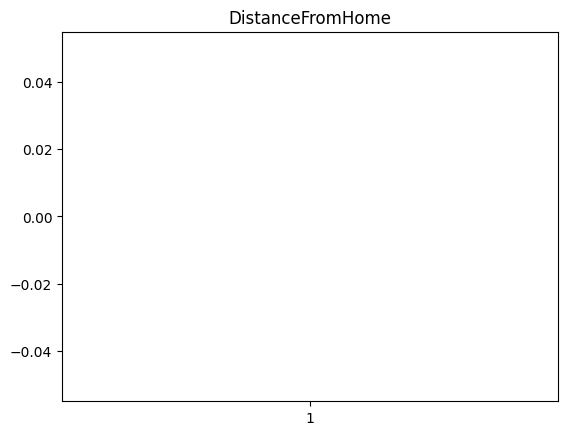

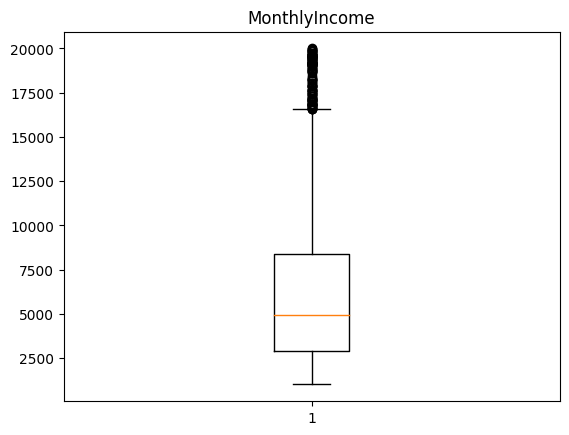

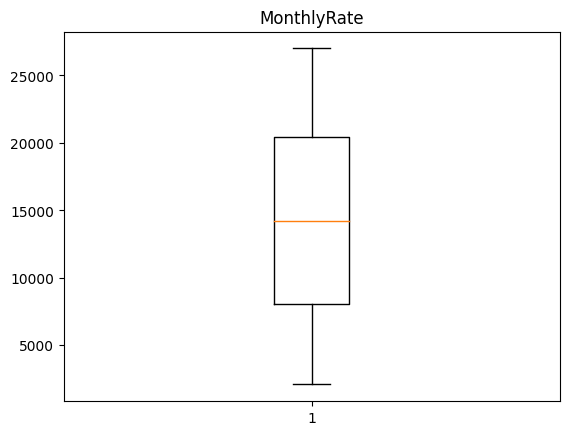

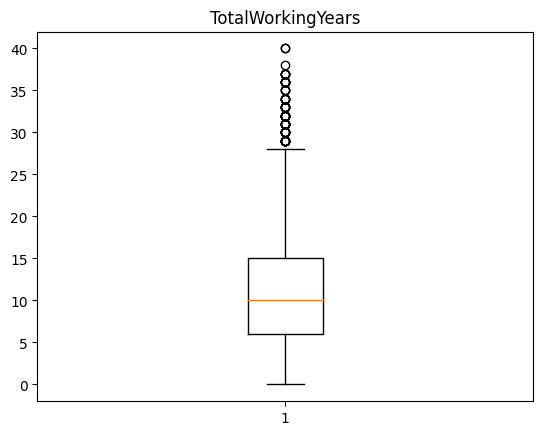

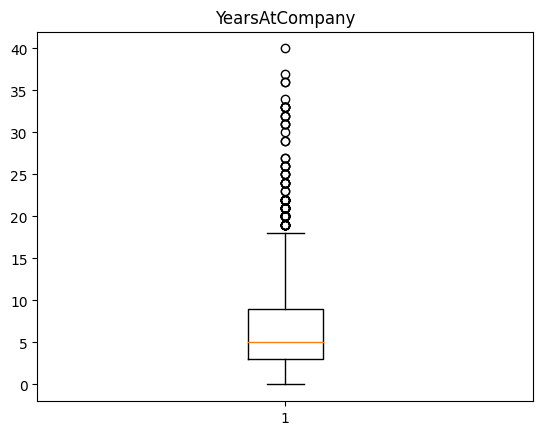

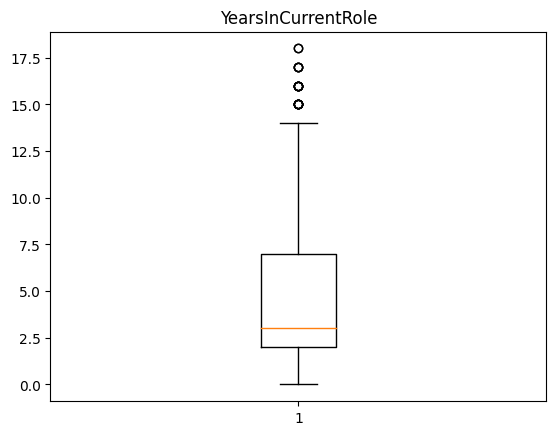

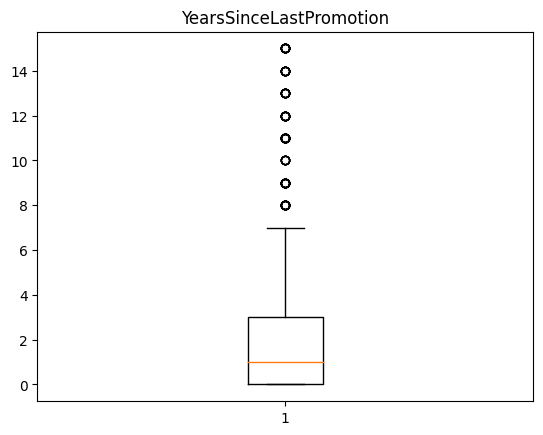

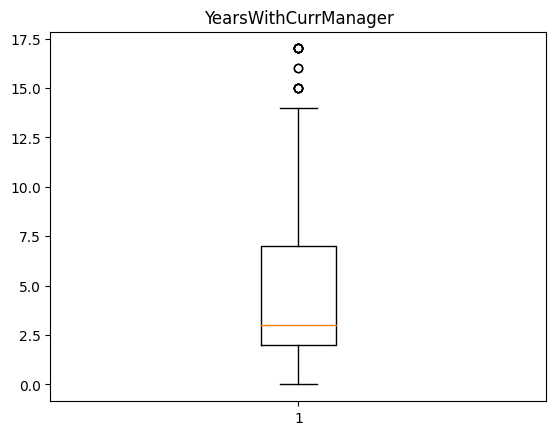

In [ ]:
for i in num_cols:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)
  plt.show()



*   OUTLIER CORRECTION



In [ ]:
# Dictionary to store quartiles and outliers
outliers = {}



*   to show outliers



In [ ]:
for col in num_cols:
    if col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q2 = data[col].quantile(0.50)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        outlier_values = data[(data[col] < lower_limit) | (data[col] > upper_limit)][col]
        outliers[col] = {
            'Q1': Q1,
            'Q2': Q2,
            'Q3': Q3,
            'Outliers': outlier_values.tolist()
        }

# Print the quartiles and outliers for each column
for col, q in outliers.items():
    print(f"{col}: Q1={q['Q1']}, Q2={q['Q2']}, Q3={q['Q3']}, Outliers={q['Outliers']}")

DistanceFromHome: Q1=2.0, Q2=7.0, Q3=14.0, Outliers=[]
MonthlyIncome: Q1=2911.0, Q2=4919.0, Q3=8379.0, Outliers=[19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 16872, 19045, 19144, 17584, 18665, 17068, 19272, 18300, 16659, 19406, 19197, 19566, 18041, 17046, 17861, 16835, 16595, 19502, 18200, 16627, 19513, 19141, 19189, 16856, 19859, 18430, 17639, 16752, 19246, 17159, 17924, 17099, 17444, 17399, 19419, 18303, 19973, 19845, 17650, 19237, 19627, 16756, 17665, 16885, 17465, 19626, 19943, 18606, 17048, 17856, 19081, 17779, 19740, 18711, 18265, 18213, 18824, 18789, 19847, 19190, 18061, 17123, 16880, 17861, 19187, 19717, 16799, 17328, 19701, 17169, 16598, 17007, 16606, 19586, 19331, 19613, 17567, 19049, 19658, 17426, 17603, 16704, 19833, 19038, 19328, 19392, 19665, 16823, 17174, 17875, 19161, 19636, 19431, 18880]
MonthlyRate: Q1=8047.0, Q2=14235.5, Q3=20461.5, Outliers=[]
TotalWorkingYears: Q1=6.0, Q2



*   using clip fn to remove outlier



In [ ]:
for col in num_cols:
    if col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q2 = data[col].quantile(0.50)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        outlier_values = data[(data[col] < lower_limit) | (data[col] > upper_limit)][col]
        outliers[col] = {
            'Q1': Q1,
            'Q2': Q2,
            'Q3': Q3,
            'Outliers': outlier_values.tolist()
        }
        data[col] = data[col].clip(lower=lower_limit, upper=upper_limit)

# Print the quartiles and outliers for each column
for col, q in outliers.items():
    print(f"{col}: Q1={q['Q1']}, Q2={q['Q2']}, Q3={q['Q3']}, Outliers={q['Outliers']}")

DistanceFromHome: Q1=2.0, Q2=7.0, Q3=14.0, Outliers=[]
MonthlyIncome: Q1=2911.0, Q2=4919.0, Q3=8379.0, Outliers=[]
MonthlyRate: Q1=8047.0, Q2=14235.5, Q3=20461.5, Outliers=[]
TotalWorkingYears: Q1=6.0, Q2=10.0, Q3=15.0, Outliers=[]
YearsAtCompany: Q1=3.0, Q2=5.0, Q3=9.0, Outliers=[]
YearsInCurrentRole: Q1=2.0, Q2=3.0, Q3=7.0, Outliers=[]
YearsSinceLastPromotion: Q1=0.0, Q2=1.0, Q3=3.0, Outliers=[]
YearsWithCurrManager: Q1=2.0, Q2=3.0, Q3=7.0, Outliers=[]


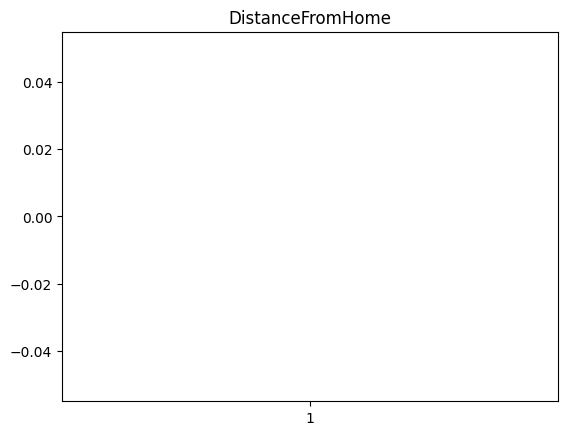

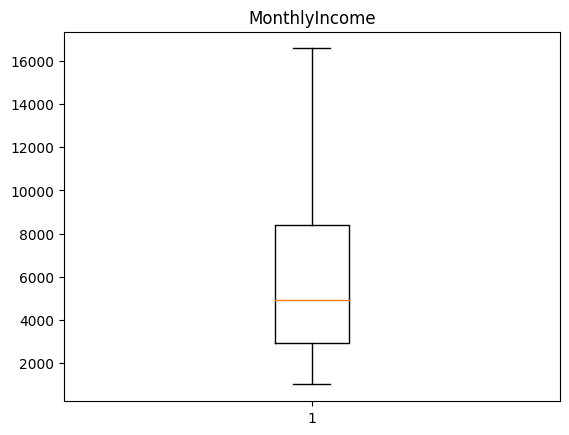

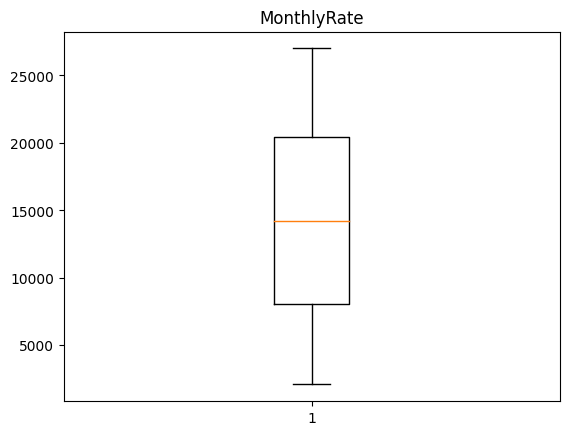

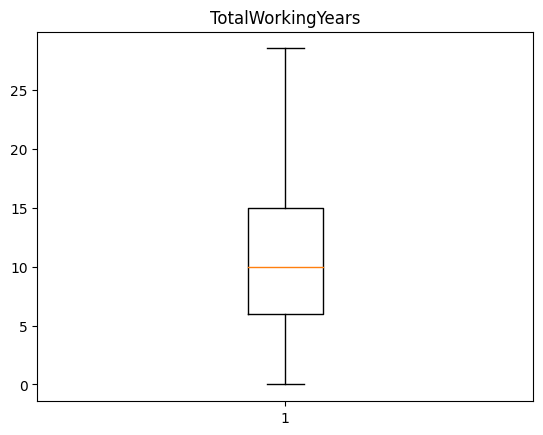

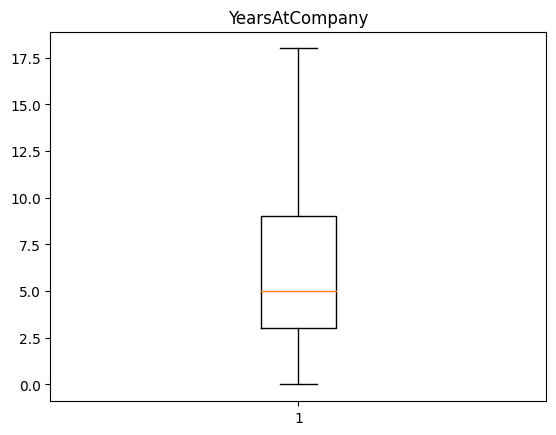

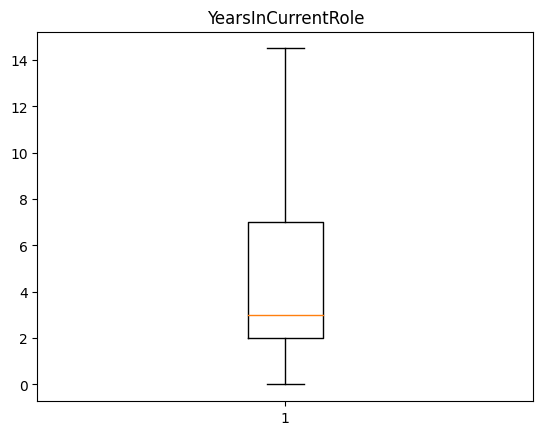

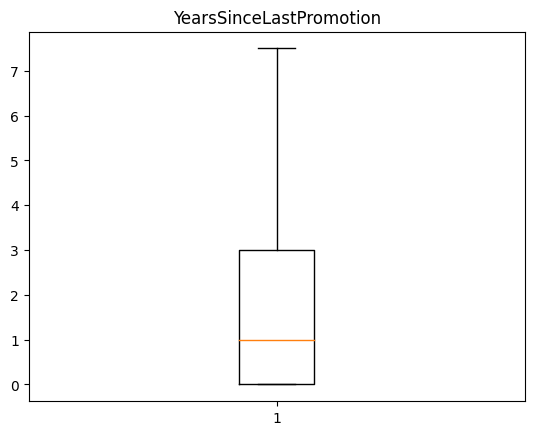

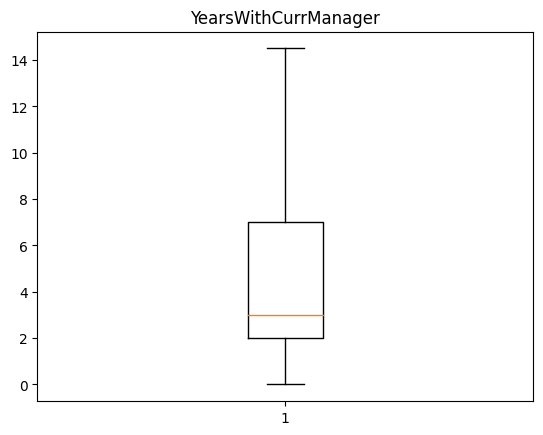

In [ ]:
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

# **FEATURE REDUCTION**



### * Removing unnecessary columns



In [4]:
data.drop(['DailyRate','EmployeeCount','EmployeeNumber', 'HourlyRate',
          'MonthlyRate','Over18','PercentSalaryHike', 'PerformanceRating',
           'StandardHours','StockOptionLevel'],axis=1,inplace=True)

In [5]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,NumCompaniesWorked,OverTime,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1.0,2,Life Sciences,2,Female,3,...,8,Yes,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8.0,1,Life Sciences,3,Male,2,...,1,No,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2.0,2,Other,4,Male,2,...,6,Yes,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3.0,4,Life Sciences,4,Female,3,...,1,Yes,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2.0,1,Medical,1,Male,3,...,9,No,4,6,3,3,2,2,2,2


In [6]:
data.shape

(1470, 25)

# **saving new data set**

In [7]:
from google.colab import files

data.to_csv('NEW_HR_DATA.csv', index=False)

# Download the file
files.download('NEW_HR_DATA.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **(3)ENC0DING**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1460 non-null   object 
 3   Department                1465 non-null   object 
 4   DistanceFromHome          1466 non-null   float64
 5   Education                 1470 non-null   int64  
 6   EducationField            1467 non-null   object 
 7   EnvironmentSatisfaction   1470 non-null   int64  
 8   Gender                    1470 non-null   object 
 9   JobInvolvement            1470 non-null   int64  
 10  JobLevel                  1470 non-null   int64  
 11  JobRole                   1470 non-null   object 
 12  JobSatisfaction           1470 non-null   int64  
 13  MaritalStatus             1470 non-null   object 
 14  MonthlyI

In [9]:
num_obj_col=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole',
             'MaritalStatus','OverTime']

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
ln=LabelEncoder()
for i in num_obj_col:
  data[i]=ln.fit_transform(data[i])

In [12]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,NumCompaniesWorked,OverTime,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1.0,2,1,2,0,3,...,8,1,1,8,0,1,6,4,0,5
1,49,0,1,1,8.0,1,1,3,1,2,...,1,0,4,10,3,3,10,7,1,7
2,37,1,2,1,2.0,2,4,4,1,2,...,6,1,2,7,3,3,0,0,0,0
3,33,0,1,1,3.0,4,1,4,0,3,...,1,1,3,8,3,3,8,7,3,0
4,27,0,2,1,2.0,1,3,1,1,3,...,9,0,4,6,3,3,2,2,2,2


In [13]:
from google.colab import files

data.to_csv('NEW_ENCODE_HR_DATA.csv', index=False)

# Download the file
files.download('NEW_ENCODE_HR_DATA.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



 *   Plot the correlation heatmap



In [ ]:
corr_matrix = data.corr()


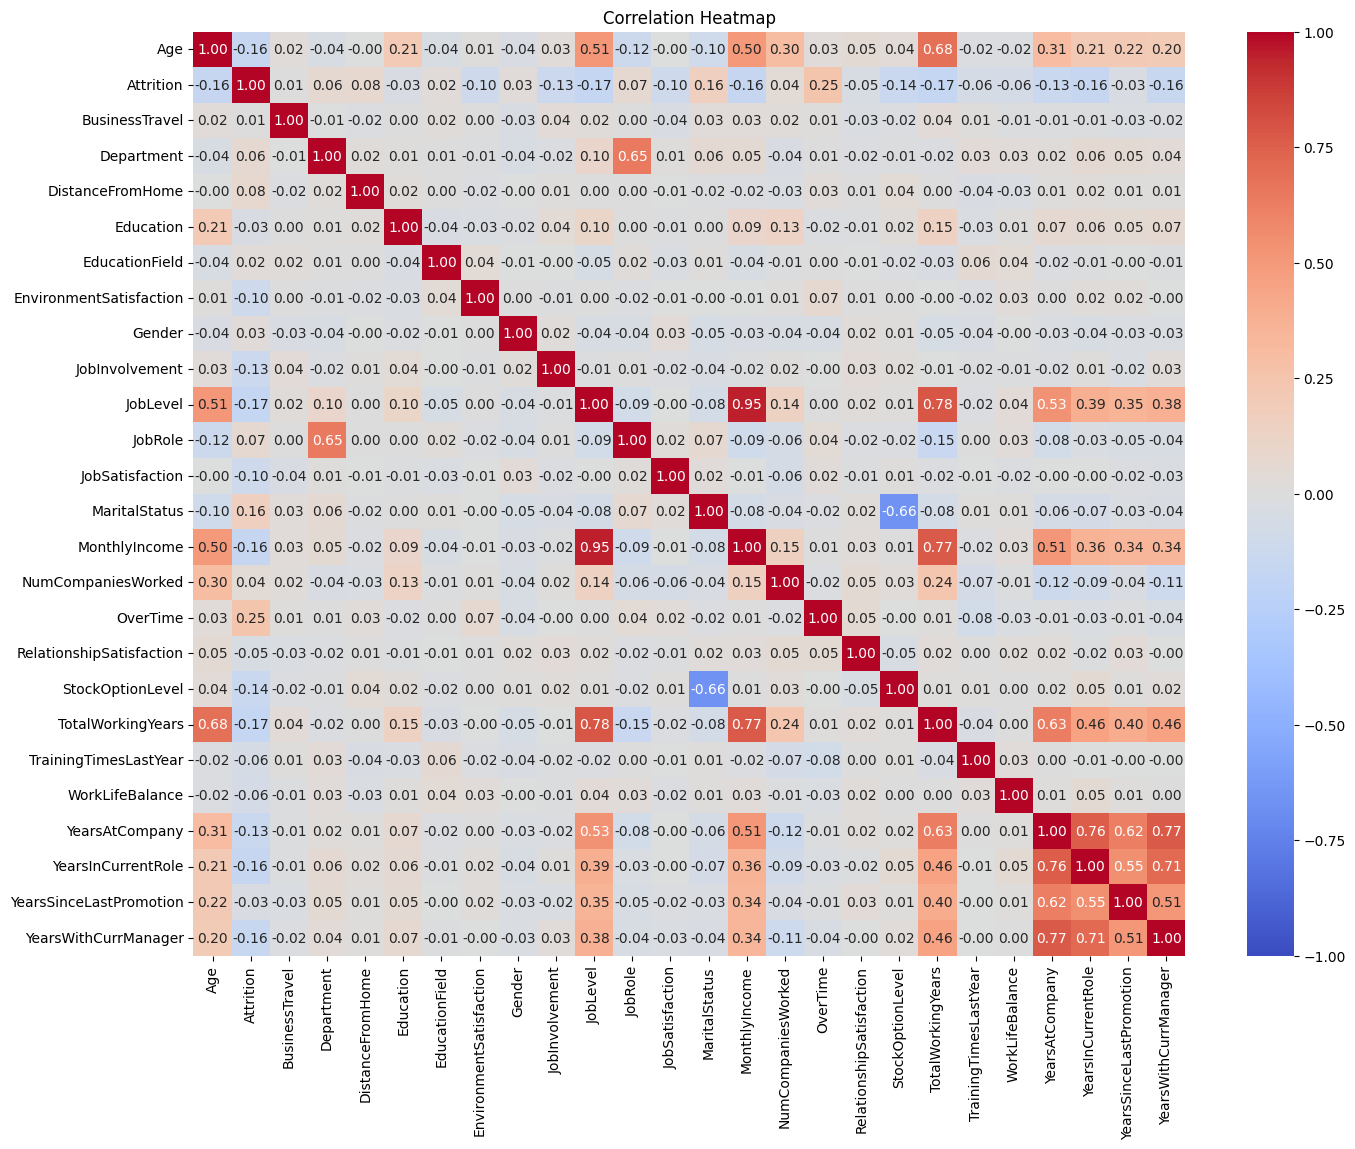

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()